# **Lab Three - Extending Logistic Regression**
- Group: `Lab One 3`
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

# **1. Preparation and Overview**

## **1.1 Business Understanding & Classification Task**

### Business Understanding
- **Obesity** is a growing global health issue, leading to numerous diseases like diabetes, cardiovascular problems, and even certain cancers. According to the World Health Organization (WHO), in 2022, over 1.9 billion adults were overweight, and 650 million of those were classified as obese (source: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight). This rise in obesity has placed significant strain on healthcare systems, making early identification and management of obesity critical to addressing this epidemic. 

- The **Estimation of Obesity Levels Based on Eating Habits and Physical Condition** dataset contains information on individual's lifestyle habits (such as eating behavior, physical activity, and family health history) along with their corresponding obesity levels. The obesity levels are classified into multiple categories: underweight, normal weight, overweight, obese type I, obese type II, and obese type III. The classification task will involve using these lifestyle attributes to predict an individual's obesity level. 

- The objective is to develop a machine learning model that accurately predicts the obesity level of an individual based on their lifestyle habits, with the goal of aiding public health efforts in early obesity detection and personalized health interventions. 

### Business Use-Case
- **Public Health**: One of the critical goals of public health organizations is to prevent chronic diseases associated with obesity, such as Type 2 diabetes and heart disease. By predicting obesity levels early, individuals can be targeted with personalized interventions, reducing the risk of severe health complications later on.
- **Healthcare Providers**: Hospitals and clinics can use this classification model to create preventive healthcare plans tailored to individuals. For example, individuals classified as overweight or at risk of obesity could be enrolled in nutrition or physical activity programs to mitigate the progression to higher obesity levels.
- **Fitness and Wellness Industry**: Personalized fitness and wellness programs rely heavily on understanding an individual's current health condition. This model can assist personal trainers, dieticians, and fitness apps in recommending targeted lifestyle changes, exercises, or dietary regimens based on the user's predicted obesity level.

### Interested Parties
- **Public Health Organizations**: Government bodies and organizations like World Health Organization (WHO) and the American Obesity Foundation (AOF) can benefit from the insights provided by this model, using it to design mass intervention programs or tailor their awareness campaigns based on obesity risk.
- **Healthcare Providers and Insurers**: Hospitals and insurance companies might be interested in using these predictions to prioritize care for high-risk individuals and create preventive strategies that reduce long-term healthcare costs.
- **Fitness and Wellness Companies**: Companies offering fitness coaching, wellness programs, and nutrition planning can use this predictive tool to personalize health plans and improve client outcomes.
- **Pharmaceutical Companies**: Lastly, understanding obesity levels in populations can also be valuable for pharmaceutical companies that develop weight management drugs, as it helps in identifying the target populations for such treatments.

### Classification Task
- This task is a **multi-class classification** problem where the `target` variable is the obesity level of individuals. The labels include the obesity categories of: 
    - underweight, normal weight, overweight, obesity type I, obesity type II, obesity type III
- The goal is to build a model that can accurately predict which category a person falls into based on a variety of lifestyle factors, such as caloric intake monitoring, frequency of physical activity, and family health history.

### Deployment vs Offline Analysis
- The model would be used mostly for **offline analysis**, helping public health organizations in analyzing population-wide obesity trends. It can be incorporated into health surveillance systems to monitor obesity levels in different demographics and regions, enabling organizations to tailor their awareness campaigns, interventions, and resource allocation. The model’s results could guide strategic decisions such as where to open more fitness centers or run more frequent public health programs focused on obesity prevention.
- For healthcare providers, the model can be used offline in hospitals and clinics to identify at-risk individuals and target interventions based on their lifestyle habits. Physicians could leverage the insights during patient checkups or preventive care planning to offer personalized advice on nutrition, exercise, or lifestyle changes. Although the model would mostly be used for analysis rather than real-time prediction, it could easily be integrated into electronic health record (EHR) systems to flag patients for obesity risk over time.

### Model Performance 
- To be useful, the model should aim for an **accuracy level of 85-90%** across all obesity levels. However, as obesity is a global health issue, precision and recall for certain categories (such as overweight or obese types) are critical to avoid false positives or false negatives. Misclassifying individuals as obese when they are not can lead to unnecessary anxiety and potentially unwarranted medical interventions. Conversely, failing to identify individuals at risk of obesity may result in delayed interventions, leading to worsening health conditions.
- For this reason, the F1 score - a balance of precision and recall - will be a key metric to evaluate the overall performance of the model. An F1 score in the range of 0.85 to 0.90 would be considered satisfactory for the business use cases mentioned above.
- Current machine learning models are being used for obesity prediction:
    - A study conducted on Indonesian health data achieved 72% accuracy using logistic regression, with a specificity of 71% and precision of 69% (source: https://www.frontiersin.org/journals/nutrition/articles/10.3389/fnut.2021.669155/full). One potential limitation of this study may have been inadequate handling of imbalanced datasets, where certain obesity levels could be underrepresented. To address and improve on this, our model will employ techniques such as oversampling minority classes or using class weights within the logistic regression algorithm, which can help the model better distinguish between different obesity levels and reduce bias toward the majority class. 
    - In another research study, a deep learning approach using Bi-LSTM combined with attention mechanisms achieved a remarkable 96.5% accuracy for obesity prediction. The model was noted for its ability to handle more complex, multifactorial data and showed superiority over traditional methods (source: https://www.mdpi.com/2306-5354/11/6/533). While logistic regression is a simpler model compared to deep learning models such as Bi-LSTM with attention mechanisms, logistic regression can still achieve competitive results with careful optimization. While aiming for the performance of deep learning models, logistic regression has the advantage of interpretability, meaning stakeholders such as healthcare providers can understand the decision process behind predictions. 
- By employing these techniques, our model could achieve an accuracy of 85-90%, with precision and recall optimized in the critical classes (overweight and obese categories). While it may not fully match the 96.5% accuracy of deep learning models like Bi-LSTM, a well-optimized logistic regression model offers the benefits of simplicity, transparency, and lower computational costs, making it more accessible. 

Dataset:
- https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition 

Introductory Paper on Dataset:
- https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

## **1.2 Loading the Dataset, Defining Data Types, & Preprocessing**

In [185]:
# Modules & Libraries
import pandas as pd
import numpy as np
import random
import time

# Linear Algebra Operations
from numpy.linalg import pinv

# Scikit-Learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy Libraries for Optimization
from scipy import optimize
from scipy.special import expit
from scipy.optimize import minimize

In [187]:
# Loading the dataset
path = '../../Data/obesity_raw_data.csv'

# Read in csv file
df = pd.read_csv(path)
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [189]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Summary of Dataset Analysis

1. **Count (2111)**:  
   Each variable has a count of 2111, indicating no missing values. This is crucial for maintaining data integrity, completeness, and preventing bias from missing data.

2. **Mean**:  
   - **First Variable (mean = 24.31)**: Likely continuous, possibly representing age or duration.  
   - **Second Variable (mean = 1.70)**: Narrow range (min = 1.45, max = 1.98), suggesting it is a ratio or scaled measure; low standard deviation (0.09) supports this.  
   - **Third Variable (mean = 86.59)**: Indicates a magnitude-based measure (e.g., income or score) with high variability (std = 26.19).  
   - **Variables 4-8**: Smaller means suggest these could represent counts or ratings on a limited scale (e.g., a 1-5 rating system).

3. **Standard Deviation (std)**:  
   - **First Variable (std = 6.35)**: Indicates moderate variability.  
   - **Third Variable (std = 26.19)**: Suggests considerable spread, possibly due to skewness or outliers.  
   - **Remaining Variables**: Lower standard deviations indicate tighter grouping around the mean, suggesting more homogeneity.

4. **Min, Max, and Percentiles**:  
   - **First Variable (min = 14, max = 61)**: Broad range suggests diverse values, with most data points between the 25th (19.95) and 75th (26) percentiles; potential outliers on the higher end.  
   - **Second Variable (min = 1.45, max = 1.98)**: Narrow range indicates it is tightly controlled.  
   - **Third Variable (min = 39, max = 173)**: High variability, with the 50th percentile (83) and 75th percentile (107.43) suggesting a skew toward higher values, possibly indicating outliers.  
   - **Variables 4-8**: 
     - **Variable 4**: Range of 1-3, likely ordinal or small-scale categorical.
     - **Variable 5**: Range of 1-4, clustering around 3 (75th percentile), suggesting skewness.
     - **Variable 6**: Limited options suggest a categorical variable.
     - **Variable 7**: Min = 0, max = 3, indicating a binary or ordinal variable where 0 represents absence.
     - **Variable 8**: Binary variable likely representing a decision or classification flag; the 50th percentile (0.625) and 75th percentile (1) indicate a tendency toward higher values.

### Critical Observations
- **High Variability**: The high standard deviation of the third variable (26.19) warrants further investigation for outliers or skewness.
- **Categorical/Ordinal Variables**: Variables 4 through 8 appear to be categorical or ordinal, requiring specialized analysis techniques, such as non-parametric tests.
- **Zero Values**: Variables 7 and 8 contain zero values; further analysis is needed to determine if these represent missing data or valid "absences."
- **Outliers**: Extreme values in the first and third variables suggest potential outliers that may skew results, necessitating further analysis for a more accurate understanding.


In [192]:
# Returns the dimensions of the dataframe as (number of rows, number of columns)
df.shape

(2111, 17)

In [194]:
# Returns an index object containing the col labels of the dataframe
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Renaming Attributes for Readability

In [197]:
df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'family_history_with_overweight': 'has_family_history_overweight',
    'FAVC': 'eats_high_caloric_food',
    'CAEC': 'food_between_meals_frequency',
    'FCVC': 'vegetable_intake_frequency',
    'NCP': 'daily_main_meals_count',
    'SMOKE': 'smokes',
    'SCC': 'monitors_calories',
    'FAF': 'physical_activity_frequency',
    'CALC': 'alcohol_consumption_frequency',
    'MTRANS': 'transportation_mode',
    'Height': 'height_m',
    'Weight': 'weight_kg',
    'CH2O': 'daily_water_intake_l',
    'TUE': 'daily_screen_time_hours',
    'NObeyesdad': 'obesity_level'
}, inplace=True)

In [199]:
# Show updated name convention
df.head(10)

,gender,age,height_m,weight_kg,has_family_history_overweight,eats_high_caloric_food,vegetable_intake_frequency,daily_main_meals_count,food_between_meals_frequency,smokes,daily_water_intake_l,monitors_calories,physical_activity_frequency,daily_screen_time_hours,alcohol_consumption_frequency,transportation_mode,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


### Checking for Duplicates & Null Values

In [202]:
# Checking for duplicates
duplicates_before = df.duplicated().sum()
print(f'Duplicates before dropping: {duplicates_before}')

Duplicates before dropping: 24


In [204]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [206]:
# Resetting the index
df = df.reset_index(drop=True)

In [208]:
# No more duplicates!
duplicates_after = df.duplicated().sum()
print(f'Duplicates after dropping: {duplicates_after}')

Duplicates after dropping: 0


In [210]:
# Checking for null values
df.isnull().sum()

gender                           0
age                              0
height_m                         0
weight_kg                        0
has_family_history_overweight    0
eats_high_caloric_food           0
vegetable_intake_frequency       0
daily_main_meals_count           0
food_between_meals_frequency     0
smokes                           0
daily_water_intake_l             0
monitors_calories                0
physical_activity_frequency      0
daily_screen_time_hours          0
alcohol_consumption_frequency    0
transportation_mode              0
obesity_level                    0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         2087 non-null   object 
 1   age                            2087 non-null   float64
 2   height_m                       2087 non-null   float64
 3   weight_kg                      2087 non-null   float64
 4   has_family_history_overweight  2087 non-null   object 
 5   eats_high_caloric_food         2087 non-null   object 
 6   vegetable_intake_frequency     2087 non-null   float64
 7   daily_main_meals_count         2087 non-null   float64
 8   food_between_meals_frequency   2087 non-null   object 
 9   smokes                         2087 non-null   object 
 10  daily_water_intake_l           2087 non-null   float64
 11  monitors_calories              2087 non-null   object 
 12  physical_activity_frequency    2087 non-null   f

In [214]:
# Checking For Outliers
df.describe()

,age,height_m,weight_kg,vegetable_intake_frequency,daily_main_meals_count,daily_water_intake_l,physical_activity_frequency,daily_screen_time_hours
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Outlier Analysis
- **Age**: An extreme outlier was detected in the `age` attribute, with a maximum value of 61 years, while the mean age is 24.3 years. After evaluating the data, we chose to drop the `age` attribute from further analysis. This decision is based on the observation that the majority of individuals fall within the 17–30 age range, a group typically more active and healthier. Given that this attribute may not significantly influence obesity trends across a relatively narrow age range, we decided to focus on other variables that could provide more insightful patterns related to obesity levels.

- **Weight**: A minor outlier was observed in the `weight_kg` attribute, with a maximum value of 173 kg, whereas the mean weight is 86.5 kg. We chose not to remove this outlier, as it may represent individuals in the Obesity Type III category. Including this higher weight could provide valuable insights into whether weight alone is a significant factor in obesity severity or if other factors play a role in determining the obesity type.


## Attributes in Dataset

### Attributes Collected in Dataset
- ### Categorical
    - `gender`: 
        - Values: Female or Male
        - Convert to bool (1=male, 0=female)

    - `has_family_history_overweight`: Has a family member suffered or suffers from overweight? 
        - Values: yes or no (binary)
        - convert to bool (1=yes, 0=no)

    - `eats_high_caloric_food`: Do you eat high caloric food frequently? 
        - Values: Yes or no (binary)
        - convert to bool (1=yes, 0=no)

    - `food_between_meals_frequency`: Do you eat any food between meals?
        - Values: No, sometimes, frequently, always
        - Label encode (0=no, 1=sometimes, 2=frequently, 3=always)

    - `smokes`: Do you smoke?
        - Values: Yes or No
        - convert to bool (1=yes, 0=no)

    - `monitors_calories`: Do you monitor the calories you eat daily?
        - Values: Yes or No
        - convert to bool (1=yes, 0=no)

    - `alcohol_consumption_frequency`: How often do you drink alcohol?
        - Values: I do not drink, sometimes, frequently, always
        - Label encode (0=no, 1=sometimes, 2=frequently, 3=always)

    - `transportation_mode`: Which transportation do you usually use?
        - Values: Automobile, Motorbike, Bike, Public Transportation, Walking
        - Label encode (1=public transportation, 2=walking, 3=automobile, 4=motorbike, 5=bike)

    - `obesity_level`: obesity levels
        - **target**
        - mapping --> INT
        - Insufficient_Weight: 0
        - Normal_Weight: 1
        - Overweight_Level_I: 2
        - Overweight_Level_II: 3
        - Obesity_Type_I: 4
        - Obesity_Type_II: 5
        - Obesity_Type_III: 6

- ### Continuous
    - #### Numeric
        - `bmi`: 
            - Aggregated attributes `height_m` and `weight_kg` and calculated to find `bmi`
            - convert to float

        - `daily_main_meals_count`: How many main meals do you have daily?
            - convert to float

        - `daily_water_intake_l`: How much water do you drink daily in Liters?
            - convert to float

        - `daily_screen_time_hours`: How much time do you use techonological devices such as cell phone, videogames, television, computer and others?
            - convert to float 

        - `physical_activity_frequency`: How often do you have physical activity?
            - convert to float


### Attributes Removed in Dataset 
- `age`: most of the dataset has age in the range 17-30; not very effective in assessing trends among different age groups. This age group is typically healthier.

- `vegetable_intake_frequency `: Since vegetables are not calorie dense, we agreed to consider high caloric foods and alcohol consumption since these behaviors are more likely to lead to caloric surplus and obesity. 

In [220]:
# Combining Height (m) and Weight (kg) Attributes into BMI
# Calculates BMI
df['bmi'] = df['weight_kg'] / (df['height_m'] ** 2)  # Calculates BMI

# Drops the original height and weight columns, as well as the attributes we decided not to use
df.drop(['height_m', 'weight_kg', 'age', 'vegetable_intake_frequency'], axis=1, inplace=True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         2087 non-null   object 
 1   has_family_history_overweight  2087 non-null   object 
 2   eats_high_caloric_food         2087 non-null   object 
 3   daily_main_meals_count         2087 non-null   float64
 4   food_between_meals_frequency   2087 non-null   object 
 5   smokes                         2087 non-null   object 
 6   daily_water_intake_l           2087 non-null   float64
 7   monitors_calories              2087 non-null   object 
 8   physical_activity_frequency    2087 non-null   float64
 9   daily_screen_time_hours        2087 non-null   float64
 10  alcohol_consumption_frequency  2087 non-null   object 
 11  transportation_mode            2087 non-null   object 
 12  obesity_level                  2087 non-null   o

### Preprocessing Dataset

#### Encoding the Target Attribute: `obesity_level`

In [226]:
# Encoding obesity level
le = LabelEncoder()
df['obesity_level_encoded'] = le.fit_transform(df['obesity_level'])

In [228]:
# Checks unique values in the original obesity_level column
print("Original 'obesity_level' values:")
print(df['obesity_level'].unique())

# Checks unique values in the obesity_level_encoded column
print("\nEncoded 'obesity_level_encoded' values:")
print(df['obesity_level_encoded'].unique())

Original 'obesity_level' values:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']

Encoded 'obesity_level_encoded' values:
[1 5 6 2 0 3 4]


#### Encoding Categorical Variables

In [233]:
# Categorical cols to encode
categorical_cols=['gender','eats_high_caloric_food','has_family_history_overweight',
                   'food_between_meals_frequency','smokes','monitors_calories','alcohol_consumption_frequency',
                   'transportation_mode','obesity_level']

# Printing unique values
_ = [print(i,df[i].unique()) for i in categorical_cols]

gender ['Female' 'Male']
eats_high_caloric_food ['no' 'yes']
has_family_history_overweight ['yes' 'no']
food_between_meals_frequency ['Sometimes' 'Frequently' 'Always' 'no']
smokes ['no' 'yes']
monitors_calories ['no' 'yes']
alcohol_consumption_frequency ['no' 'Sometimes' 'Frequently' 'Always']
transportation_mode ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
obesity_level ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [235]:
# Ensure only string columns are processed with .str.lower()
for col in categorical_cols:
    # Check if the column is of object type
    if df[col].dtype == 'object':  
        df[col] = df[col].str.lower()

# Encoding categorical attributes
df.replace(to_replace=['female', 'male'], value=[0, 1], inplace=True)
df.replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df.replace(to_replace=['no', 'sometimes', 'frequently', 'always'], value=[0, 1, 2, 3], inplace=True)
df.replace(to_replace=['public transportation', 'walking', 'automobile', 'motorbike', 'bike'], value=[1, 2, 3, 4, 5], inplace=True)

In [237]:
# Verifying encoding was applied correctly
_ = [print(i, df[i].unique()) for i in categorical_cols]

gender [0 1]
eats_high_caloric_food [0 1]
has_family_history_overweight [1 0]
food_between_meals_frequency [1 2 3 0]
smokes [0 1]
monitors_calories [0 1]
alcohol_consumption_frequency [0 1 2 3]
transportation_mode ['public_transportation' 2 3 4 5]
obesity_level ['normal_weight' 'overweight_level_i' 'overweight_level_ii'
 'obesity_type_i' 'insufficient_weight' 'obesity_type_ii'
 'obesity_type_iii']


#### Standardizing Numeric Features

In [240]:
# Numeric features to scale using StandardScaler
numeric_cols = [
    'bmi',                               
    'daily_main_meals_count',           
    'daily_water_intake_l',           
    'physical_activity_frequency',        
    'daily_screen_time_hours'             
]

# Scales the numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [242]:
# Ensures all column names are lowercase
df.columns = df.columns.str.lower()

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         2087 non-null   int64  
 1   has_family_history_overweight  2087 non-null   int64  
 2   eats_high_caloric_food         2087 non-null   int64  
 3   daily_main_meals_count         2087 non-null   float64
 4   food_between_meals_frequency   2087 non-null   int64  
 5   smokes                         2087 non-null   int64  
 6   daily_water_intake_l           2087 non-null   float64
 7   monitors_calories              2087 non-null   int64  
 8   physical_activity_frequency    2087 non-null   float64
 9   daily_screen_time_hours        2087 non-null   float64
 10  alcohol_consumption_frequency  2087 non-null   int64  
 11  transportation_mode            2087 non-null   object 
 12  obesity_level                  2087 non-null   o

In [246]:
# List of columns to keep after being encoded/scaled
columns_to_keep = [
    'obesity_level_encoded', # target
    'daily_main_meals_count',
    'daily_water_intake_l',
    'physical_activity_frequency',
    'daily_screen_time_hours',
    'bmi',
    'gender',
    'has_family_history_overweight',
    'eats_high_caloric_food',
    'food_between_meals_frequency',
    'smokes',
    'monitors_calories',
    'alcohol_consumption_frequency',
    'transportation_mode'
]

# Drops original attributes, keeping only encoded/scaled columns
df_preprocessed = df[columns_to_keep].copy()

# Ensure preprocessing steps correct 
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   obesity_level_encoded          2087 non-null   int64  
 1   daily_main_meals_count         2087 non-null   float64
 2   daily_water_intake_l           2087 non-null   float64
 3   physical_activity_frequency    2087 non-null   float64
 4   daily_screen_time_hours        2087 non-null   float64
 5   bmi                            2087 non-null   float64
 6   gender                         2087 non-null   int64  
 7   has_family_history_overweight  2087 non-null   int64  
 8   eats_high_caloric_food         2087 non-null   int64  
 9   food_between_meals_frequency   2087 non-null   int64  
 10  smokes                         2087 non-null   int64  
 11  monitors_calories              2087 non-null   int64  
 12  alcohol_consumption_frequency  2087 non-null   i

### Final Dataset Overview for Classification/Regression

The final dataset consists of **2087 entries** and **14 columns**, and several transformations were made to prepare it for classification. This involved creating new features, one-hot encoding categorical variables, standardizing continuous variables using `StandardScaler`, and dropping unnecessary columns.

#### 1. Newly Created Variables
- **BMI (Body Mass Index)**: A new variable calculated using the formula:  
$$
\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}
$$
  This combines height and weight into a single feature, which is important for predicting obesity levels.
  
- **Obesity Level Encoded**: The target variable, `obesity_level`, was originally categorical and was encoded into integer values (as `obesity_level_encoded`) to suit classification.

#### 2. Dropped Columns
Some features were removed either because they did not contribute meaningfully to the model:
- **Age**: Dropped due to not enough diverse range to analyze trends..
- **Height and Weight**: Dropped after aggregating to create the `BMI` feature.
- **Vegetable Intake Frequency**: Removed due to focusing more on high caloric intake and other behavioral attributes that are more likely to cause obesity.

#### 3. Categorical Variables Transformation
Categorical variables were transformed using **one-hot encoding**:
- **Gender**: Encoded Female to 0 and Male to 1.
- **Family History of Overweight**: Encoded no to 0 and yes to 1.
- **High Caloric Food Consumption**: Encoded no to 0 and yes to 1.
- **Food Between Meals**: Encoded 0 for no, 1 for Sometimes, 2 for Frequently, & 3 for Always
- **Smoking Status**: Encoded as 0 for no and 1 for yes.
- **Calorie Monitoring**: Encoded as 0 for no and 1 for yes.
- **Alcohol Consumption Frequency**: Encoded as 0 for no, 1 for Sometimes, 2 for Frequently, & 3 for Always 
- **Transportation Mode**: Encoded as 1 for Public Transportation, 2 for Walking, 3 for Automobile, 4 for Motorbike, & 5 for Bike

#### 4. Standardization of Numerical Attributes
Continuous numerical variables, including `daily_main_meals_count`, `daily_water_intake_l`, `physical_activity_frequency`, and `daily_screen_time_hours`, were standardized using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1. This step helps improve the performance of the classification model.


## Breakdown of Variables After Preprocessing

In [250]:
# Display summary stats
df_preprocessed.describe()

,obesity_level_encoded,daily_main_meals_count,daily_water_intake_l,physical_activity_frequency,daily_screen_time_hours,bmi,gender,has_family_history_overweight,eats_high_caloric_food,food_between_meals_frequency,smokes,monitors_calories,alcohol_consumption_frequency
count,2087.000000,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,3.014375,1.736353e-16,4.085536e-16,2.587506e-16,-1.089476e-16,5.992119e-16,0.504073,0.825108,0.883565,1.146143,0.021083,0.045999,0.729756
std,1.948470,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,0.500103,0.379966,0.320823,0.459494,0.143695,0.209533,0.517008
min,0.000000,-2.225418e+00,-1.652172e+00,-1.186977e+00,-1.090505e+00,-2.089873e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-4.856048e-03,-6.804829e-01,-1.041062e+00,-1.090505e+00,-6.726728e-01,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,3.909061e-01,-7.809793e-03,-1.501506e-02,-5.290961e-02,-1.083800e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,5.000000,3.909061e-01,7.587794e-01,7.796945e-01,5.542111e-01,7.889530e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,6.000000,1.699068e+00,1.636552e+00,2.328908e+00,2.198928e+00,2.623204e+00,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000


### Breakdown of Numeric Attributes

#### 1. **`obesity_level_encoded`** (Target Variable)
- **Range**: 0 to 6.
  - **0**: Represents the lowest obesity level (Insufficient_Weight).
  - **6**: Represents the highest obesity level (Obesity_Type_III).
- **Mean**: 3.014
  - A mean of 3 suggests that most individuals fall around the middle range of the obesity scale, potentially indicating overweight or moderate obesity levels as the norm in this dataset.
- **Standard Deviation**: 1.948
  - Indicates a significant spread across all obesity levels. Individuals vary widely from underweight to severely obese.

**Interpretation**: This variable is the target for classification, where lower values indicate healthier or normal weight categories and higher values indicate various levels of obesity.

---

#### 2. **`daily_main_meals_count`**
- **Standardized Mean**: ~0 (standardized).
- **Standardized Range**: [-2.22, 1.69].
  - **Negative Values**:
    - A negative value indicates fewer than the average number of meals per day compared to the rest of the population. For example, a value of `-2.22` means the individual consumes significantly fewer meals than most people.
  - **Positive Values**:
    - A positive value means a higher number of main meals than the average. A value of `1.69` suggests the individual eats more than the typical daily meal count.
- **Std**: 1.00 (standardized).

**Interpretation**: Higher values reflect individuals consuming more meals per day, possibly impacting their energy balance and obesity level. Fewer meals (negative values) could suggest irregular eating patterns, which might correlate with obesity in some cases.

---

#### 3. **`daily_water_intake_l`** (Liters of Water Consumed per Day)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-1.65, 1.63].
  - **Negative Values**:
    - A negative value indicates less than average daily water consumption. For example, `-1.65` suggests very low water intake compared to others.
  - **Positive Values**:
    - Positive values indicate more water consumption than average. For example, `1.63` represents individuals who drink significantly more water than the norm.
- **Std**: 1.00.

**Interpretation**: Individuals with negative values (low water intake) may be less hydrated, which can impact metabolism and weight regulation. High water intake (positive values) is often associated with healthier habits and better weight management.

---

#### 4. **`physical_activity_frequency`** (Frequency of Physical Activity)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-1.19, 2.33].
  - **Negative Values**:
    - A negative value suggests less frequent physical activity than the average. A value of `-1.19` could indicate a sedentary lifestyle, which is a risk factor for obesity.
  - **Positive Values**:
    - Positive values indicate a higher frequency of physical activity. For example, `2.33` represents individuals with high levels of physical activity, such as regular workouts or an active daily routine.
- **Std**: 1.00.

**Interpretation**: Physical activity is a critical factor in obesity. Individuals with low (negative) values are at a higher risk of obesity due to reduced energy expenditure. Conversely, those with higher (positive) values are more likely to have healthier weight levels due to frequent exercise.

---

#### 5. **`daily_screen_time_hours`** (Hours Spent on Screens Daily)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-1.09, 2.20].
  - **Negative Values**:
    - A negative value indicates less screen time than average. For instance, `-1.09` suggests that an individual spends significantly less time in front of screens (TV, computer, phone) compared to others.
  - **Positive Values**:
    - A positive value indicates more screen time than average. A value of `2.20` reflects individuals who spend significantly more time on screens, which is often linked to sedentary behavior and a higher risk of obesity.
- **Std**: 1.00.

**Interpretation**: Daily screen time is associated with sedentary behavior. Higher (positive) values suggest more time spent on screens, possibly contributing to a more sedentary lifestyle and higher obesity risk. Lower (negative) values could indicate more active lifestyles, as less screen time leaves more room for physical activity.

---

#### 6. **`bmi`** (Body Mass Index)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-2.09, 2.62].
  - **Negative Values**:
    - A negative BMI value suggests that the individual has a lower BMI than average, which could imply they are underweight or within a healthy range. For example, `-2.09` likely corresponds to underweight individuals.
  - **Positive Values**:
    - Positive BMI values indicate individuals with a higher BMI than average. A value of `2.62` points to individuals with a significantly higher BMI, likely within the overweight or obese categories.
- **Std**: 1.00.

**Interpretation**: BMI is one of the strongest indicators of obesity. Higher values (positive) are closely linked to overweight and obesity, while lower values (negative) suggest underweight or normal weight individuals. Standardizing BMI helps logistic regression treat it equally with other features when predicting obesity.

---

#### Summary of Numeric Features:
- **Negative Values**: Indicate individuals falling below the average for that specific feature.
  - Examples:
    - **Negative meal counts**: Fewer meals per day.
    - **Negative water intake**: Less water consumed daily.
    - **Negative physical activity**: Lower frequency of physical activity.
    - **Negative screen time**: Less time spent on screens, possibly indicating a more active lifestyle.
    - **Negative BMI**: Lower BMI, likely representing healthier or underweight individuals.

- **Positive Values**: Indicate individuals above the average for that specific feature.
  - Examples:
    - **Positive meal counts**: More meals per day.
    - **Positive water intake**: More water consumed daily, which may indicate healthy hydration habits.
    - **Positive physical activity**: Higher frequency of physical activity, indicating a healthier, more active lifestyle.
    - **Positive screen time**: More time spent on screens, often associated with sedentary behavior.
    - **Positive BMI**: Higher BMI, indicating overweight or obesity.

---

#### Logistic Regression Context:
For logistic regression, standardizing all features ensures that the model can properly weigh each factor without any single feature having disproportionate influence due to scale differences. Logistic regression will use these numeric features to classify the obesity levels, learning from how variations in meal frequency, water intake, physical activity, screen time, and BMI contribute to predicting obesity. The spread of values in both negative and positive directions will help the model identify patterns for different levels of obesity.


### Breakdown of Categorical Attributes

#### Obesity Level Distributions

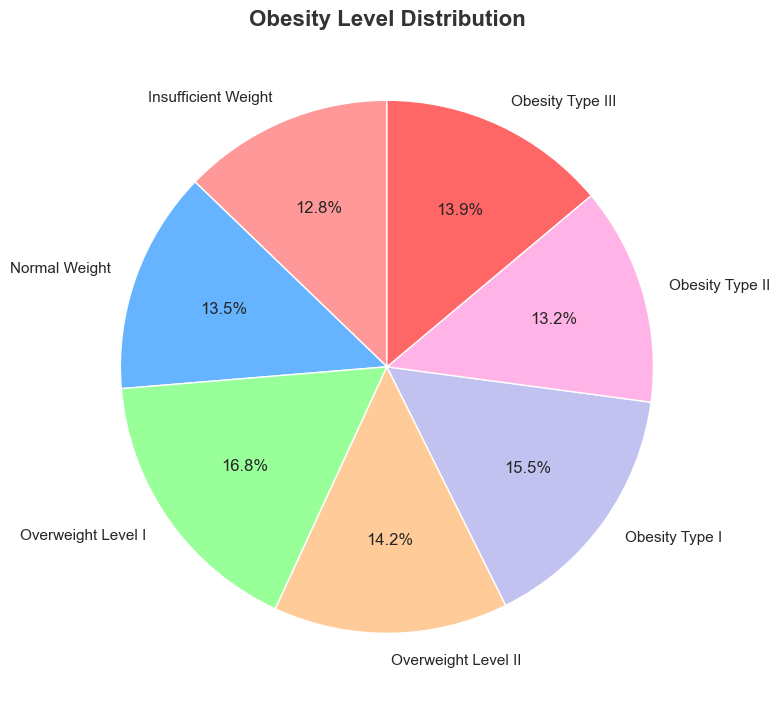

In [255]:
# Define the mapping for the labels
obesity_labels = {
    0: 'Insufficient Weight',
    1: 'Normal Weight',
    2: 'Overweight Level I',
    3: 'Overweight Level II',
    4: 'Obesity Type I',
    5: 'Obesity Type II',
    6: 'Obesity Type III'
}

# Calculate the count of each category in 'obesity_level_encoded'
obesity_counts = df['obesity_level_encoded'].value_counts().sort_index()

# Apply the mapping to the labels
labels = [obesity_labels[i] for i in obesity_counts.index]

# Define custom colors for the pie chart
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, 
        labels=labels, 
        autopct='%1.1f%%',  
        startangle=90,  
        colors=custom_colors,  
        pctdistance=0.65,  
        wedgeprops={'edgecolor': 'white'})  

# Title and layout adjustment
plt.title('Obesity Level Distribution', fontsize=16, fontweight='bold', color='#333333')
plt.tight_layout()

# Show the plot
plt.show()

The obesity levels in the dataset are evenly distributed among all categories, suggesting a balanced representation of individuals from various weight categories. This even distribution could indicate a diverse population in terms of health behaviors and lifestyle factors with no single group being overly predominant.

The balanced distribution raises several important questions:
- Are there any significant correlations between demographic factors, such as gender, and obesity levels? Could physical activity levels be a key differentiator among weight categories?
- How do family history, dietary habits, and exercise routines influence the distribution of obesity levels in this population?
- Does this balanced representation reflect broader societal trends in weight management, or is it specific to the population from which this data was collected?

Further analysis could address these questions by examining the relationships between obesity levels and other factors within the dataset. This exploration may help identify potential risk factors or protective behaviors associated with specific weight categories. Understanding these relationships could inform targeted interventions and strategies for managing obesity and improving overall health outcomes.

#### Modes of Transportation Distributions

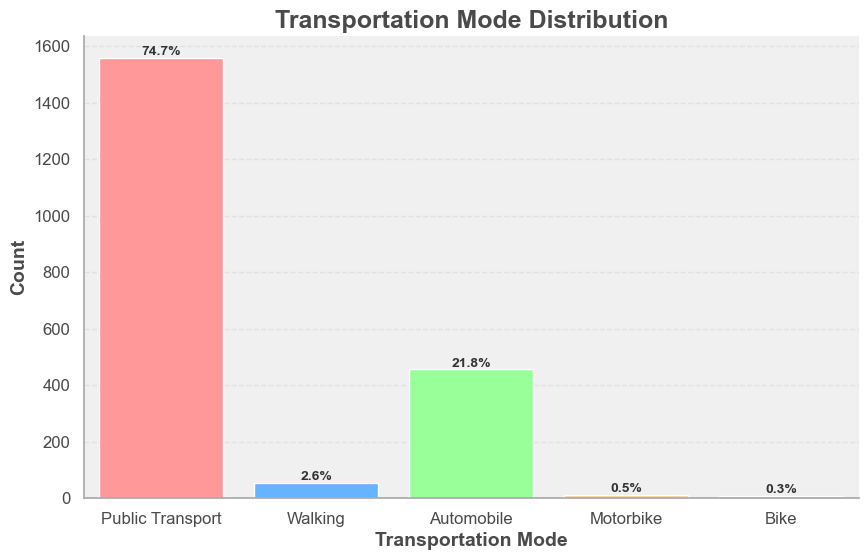

In [259]:
# Color list for the bars
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Style for the plots
sns.set(style="whitegrid")

# Figure size
plt.figure(figsize=(10, 6))

# Countplot with a default color
bars = sns.countplot(x='transportation_mode', data=df, color=custom_colors[0])  # Set a default color

# Assigns colors to each bar individually
for i, bar in enumerate(bars.patches):
    bar.set_facecolor(custom_colors[i])  # Applies custom color to each bar

# Calculates the total # of counts for percentages
total_count = len(df['transportation_mode'])

# Adds data labels (percentages) on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    percentage = (height / total_count) * 100
    bars.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', 
              ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333333')

# Customizing the plot 
plt.title('Transportation Mode Distribution', fontsize=18, fontweight='bold', color='#4a4a4a')
plt.xlabel('Transportation Mode', fontsize=14, fontweight='bold', color='#4a4a4a')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#4a4a4a')

# Custom tick labels and their font size/color
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Public Transport', 'Walking', 'Automobile', 'Motorbike', 'Bike'], fontsize=12, color='#4a4a4a')
plt.yticks(fontsize=12, color='#4a4a4a')

# Customize the background and grid
plt.gca().set_facecolor('#f0f0f0')  
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#dcdcdc')  

# Adds a border around the plot area
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#aaaaaa')
plt.gca().spines['bottom'].set_color('#aaaaaa')

# Shows the plot
plt.show()

Analysis of Transportation Modes in Relation to the Obesity Dataset

1. Automobile (21.8%)
A significant portion of individuals using automobiles as their primary mode of transportation may face more sedentary lifestyles. Since driving typically involves prolonged sitting, this can contribute to a lack of daily physical activity, which is linked to higher BMI and obesity levels. In the context of the obesity dataset, individuals who rely on cars may show a higher prevalence of overweight or obesity compared to those who use more active forms of transportation.

2. Bike (0.3%) and Motorbike (0.5%)
The very low usage of biking suggests that few individuals in this dataset engage in cycling, which is a form of active transportation linked to better physical health and lower BMI. This could indicate a missed opportunity for increasing daily activity, especially given the benefits of cycling for weight management. The low motorbike usage likely has a limited impact on physical activity levels, as it’s more similar to driving in terms of being a passive mode of transportation.

3. Public Transportation (74.7%)
The majority of individuals using public transportation likely spend significant amounts of time sitting while commuting, which could contribute to sedentary behaviors. However, public transportation users often walk to and from bus or train stations, which introduces some light physical activity. In the obesity dataset, those relying on public transportation may have a mixed profile: they could experience less overall physical activity compared to walkers or cyclists, but more than those using automobiles.

4. Walking (2.6%)
Although a small percentage, individuals who walk as their primary mode of transportation are likely more physically active on a daily basis. This group may have a lower prevalence of obesity or overweight, as walking is a form of moderate-intensity physical activity that can help regulate body weight. In the dataset, these individuals might fall under the "normal weight" or "insufficient weight" categories more frequently than other transportation groups.

Potential Insights and Recommendations
- **Obesity and Sedentary Lifestyles**: The high reliance on **automobiles** and **public transportation** suggests that a large portion of the population may engage in sedentary activities during their commute, which could contribute to higher obesity rates. Encouraging more active forms of commuting, such as walking or biking, could potentially help in reducing the obesity levels within the population.
  
- **Active Transportation for Obesity Prevention**: The low percentage of individuals using **bikes** or **walking** highlights an opportunity to promote active transportation methods, which are associated with healthier weight profiles. Programs or policies could be introduced to encourage walking or cycling as part of daily routines, particularly for individuals classified as "overweight" or "obese" in the dataset.

- **Public Transit and Physical Activity**: While **public transportation** is the most used mode, efforts to increase walking distances to and from transit stations or encouraging standing during short rides could help mitigate some of the sedentary effects associated with this mode.

#### Alcohol Frequency Distributions

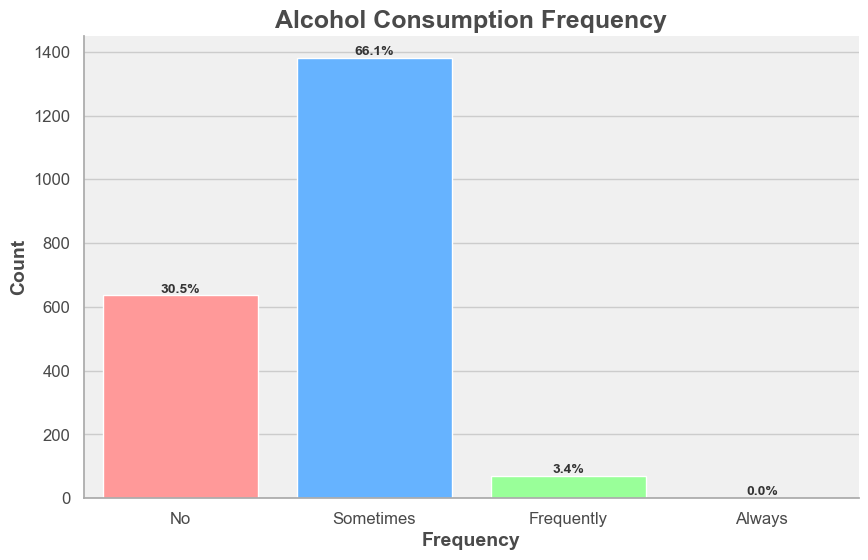

In [263]:
# Custom color list for the bars
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Figure size
plt.figure(figsize=(10, 6))

# Uses color and remove hue and legend
bars = sns.countplot(x='alcohol_consumption_frequency', data=df, color=custom_colors[0])

# Assigns colors to each bar individually
for i, bar in enumerate(bars.patches):
    bar.set_facecolor(custom_colors[i])

# Calculates the total # of counts for percentages
total_count = len(df['alcohol_consumption_frequency'])

# Adds data labels (percentages) on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    percentage = (height / total_count) * 100
    bars.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', 
              ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333333')

# Customizes the plot
plt.title('Alcohol Consumption Frequency', fontsize=18, fontweight='bold', color='#4a4a4a')
plt.xlabel('Frequency', fontsize=14, fontweight='bold', color='#4a4a4a')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#4a4a4a')

# Custom tick labels and their font size/color
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Sometimes', 'Frequently', 'Always'], fontsize=12, color='#4a4a4a')
plt.yticks(fontsize=12, color='#4a4a4a')

# Customizes the background and grid
plt.gca().set_facecolor('#f0f0f0')  
# Soft gridlines

# Adds a border around the plot area
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#aaaaaa')
plt.gca().spines['bottom'].set_color('#aaaaaa')

# Shows the plot
plt.show()

Analysis of Alcohol Consumption Frequency in Relation to Obesity Levels

1. Always (0%)
There are no individuals in the dataset who consume alcohol "always." Chronic alcohol consumption is often associated with higher calorie intake and poor dietary choices, both of which contribute to weight gain. However, the complete absence of individuals in this category suggests that constant alcohol consumption may not be a common behavior in this population. This lack of data could reflect cultural, demographic, or lifestyle factors, indicating that extreme alcohol consumption is not a significant factor affecting obesity levels in this group.

2. Frequently (3.4%)
A small percentage of individuals report consuming alcohol "frequently." Frequent alcohol consumption can lead to increased caloric intake due to the empty calories in alcohol. Additionally, habitual drinking may contribute to weight gain by disrupting healthy eating patterns or reducing physical activity. In this dataset, these individuals may show a slightly higher prevalence of overweight or obesity compared to those who drink less often, as regular alcohol consumption can contribute to a sustained caloric surplus over time.viduals may show a slightly higher prevalence of overweight or obesity compared to those who drink less frequently.

3. Sometimes (66.1%)
The majority of individuals in the dataset consume alcohol "sometimes." Occasional alcohol consumption may not have a major direct impact on weight, but depending on the amount and frequency, it can still contribute to excess calorie intake. This group is likely to display varied weight outcomes, as alcohol consumption in moderation may not significantly affect some individuals, while others may experience weight gain. Since this category covers a broad spectrum of drinking habits, it’s reasonable to expect that individuals in this group will span multiple weight categories, from normal weight to overweight or obese.

4. Never (30.5%)
A significant portion of the population, 30.5%, reports never consuming alcohol. These individuals are less likely to gain weight from alcohol-related calorie intake, which could result in more favorable weight outcomes. However, their weight outcomes will still depend on other factors such as diet, exercise, and genetics. This group may be more represented in the "normal weight" or "underweight" categories, as they avoid the additional calories associated with alcohol consumption.

Alcohol consumption frequency appears to have a modest influence on obesity levels in this dataset. With the majority of individuals consuming alcohol only occasionally, it is likely that alcohol contributes to obesity in an indirect manner, potentially through excess calorie intake. The sizable group of individuals who never consume alcohol may exhibit more favorable weight outcomes, although further analysis would be required to confirm this trend. Encouraging moderation in alcohol consumption, alongside other healthy behaviors, could be a useful strategy in addressing weight management challenges.

#### Food Between Meals Frequency Distribution

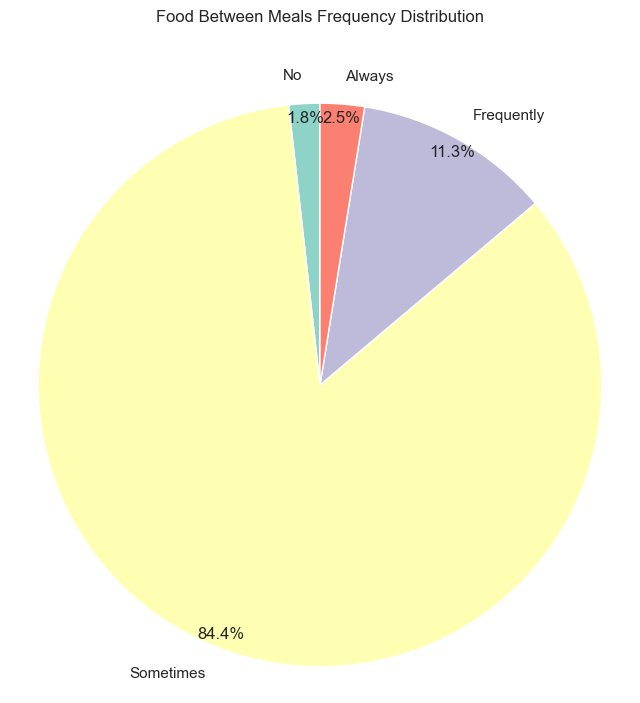

In [267]:
# Defines the labels and their corresponding numerical encoding
labels = ['No', 'Sometimes', 'Frequently', 'Always']

# Counts the occurrences of each category based on the original encoding
counts = df['food_between_meals_frequency'].value_counts().sort_index()

# Creates a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, 
        labeldistance=1.1, pctdistance=0.95, colors=plt.get_cmap('Set3').colors[:4])

# Adds title with padding
plt.title('Food Between Meals Frequency Distribution', pad=40)

# Ensures the pie chart is a circle
plt.axis('equal')

plt.show()

Food Between Meals Frequency in Relation to Obesity Levels

1. Sometimes (84.4%)
A significant majority of individuals in the dataset consume food between meals "sometimes." This behavior can potentially contribute to caloric overconsumption if the snacks are high in calories, which could explain the high prevalence of overweight or obesity in this group. However, "sometimes" could also reflect mindful snacking, so the obesity outcomes for this group may vary based on the quality of food consumed between meals.

2. Frequently (11.3%)
A smaller portion of individuals snack "frequently," which is more likely to contribute to weight gain if these snacks are not nutritionally balanced. Frequent eating between meals, especially of high-calorie foods, can lead to an increased caloric intake, which may contribute to higher levels of overweight or obesity. This group is expected to show a higher likelihood of being overweight or obese compared to the "sometimes" group.

3. Always (2.5%)
Only a small percentage of individuals report "always" eating food between meals. Constant snacking can significantly increase daily caloric intake, especially if the snacks are not healthy. This behavior is often associated with poor dietary habits and can directly lead to weight gain. In the obesity dataset, this group is likely to have a higher representation in the obesity categories, particularly those with more severe levels of obesity.

4. Never (1.8%)
A very small portion of individuals report "never" eating food between meals. This group may maintain better portion control and caloric balance, which could help in weight management. It is likely that these individuals are more represented in the "normal weight" or "underweight" categories, though other lifestyle factors, such as physical activity, will also influence their overall weight outcomes.

The frequency of eating between meals appears to have a strong correlation with obesity levels. The majority of the population snacks "sometimes," which can result in varied weight outcomes depending on the quality of snacks consumed. Those who snack "frequently" or "always" are at higher risk of obesity, while the small percentage who "never" snack may maintain healthier weight levels. To combat obesity, promoting healthier snack options and mindful eating could be key strategies.

#### Distributions for Binary Categorical Attributes

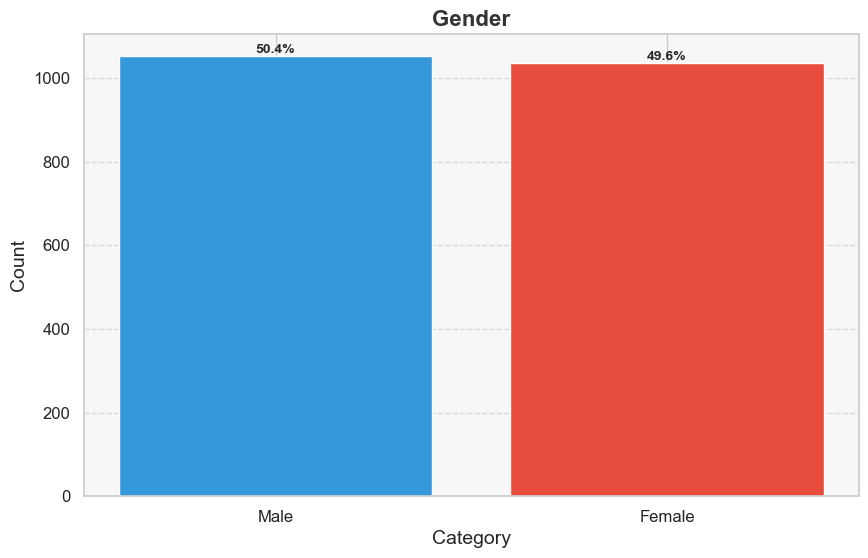

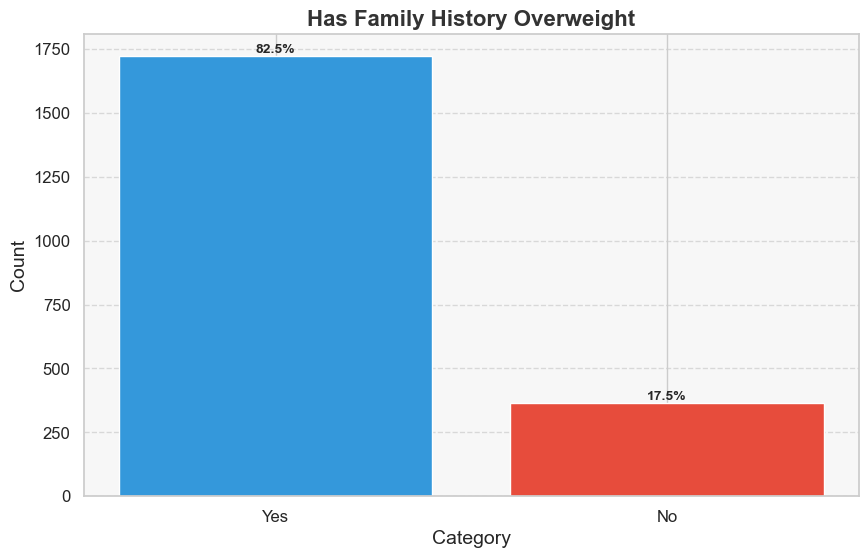

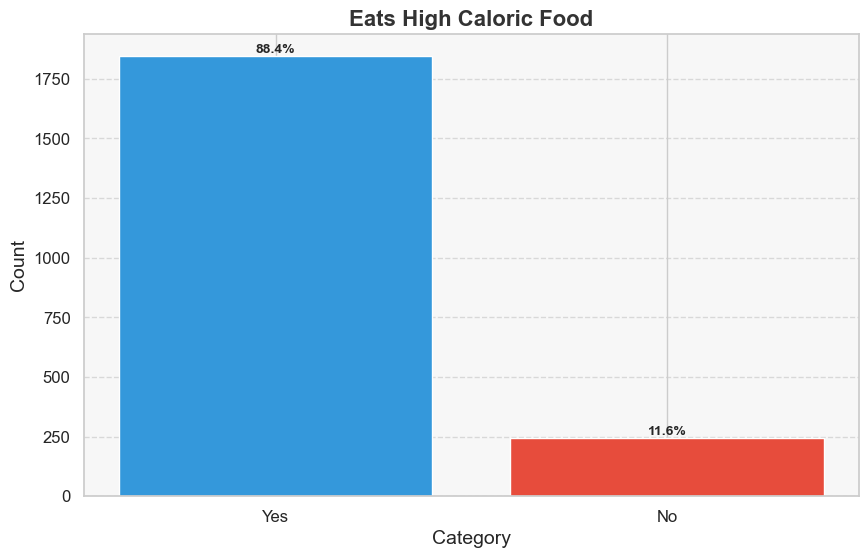

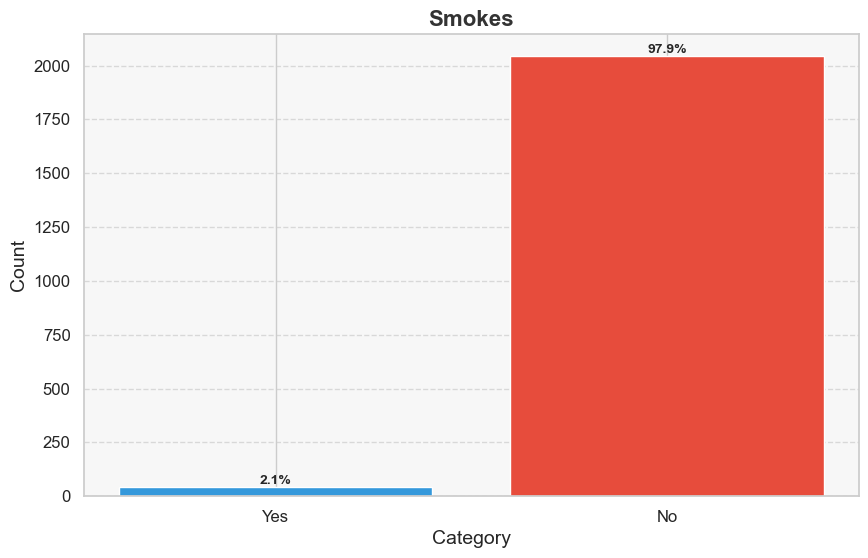

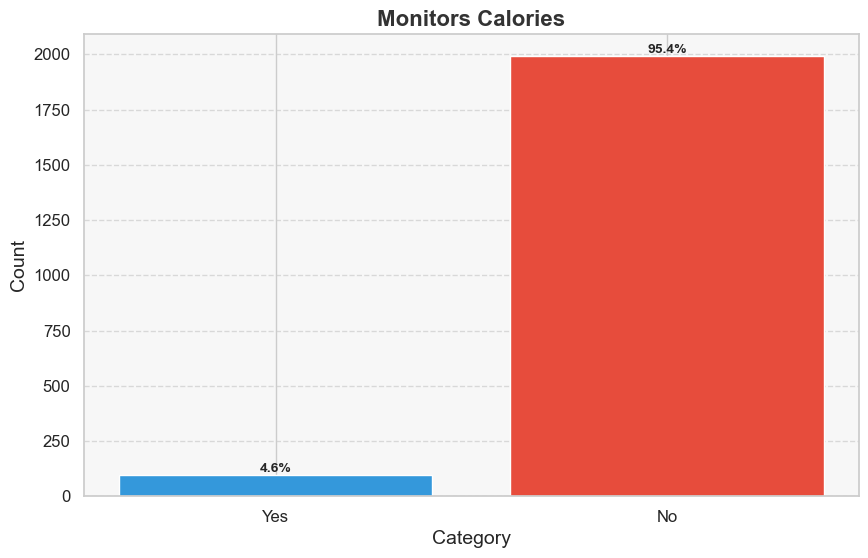

In [271]:
# Blue and red for binary variables
colors = ['#3498db', '#e74c3c']  

# Lists of columns to plot
columns_to_plot = [
    'gender',
    'has_family_history_overweight',
    'eats_high_caloric_food',
    'smokes',
    'monitors_calories'
]

# Function to plot binary variables
def plot_binary_variable(column, category_labels):
    count_yes = df_preprocessed[column].sum()
    count_no = len(df_preprocessed) - count_yes
    
    # Create DataFrame for plotting
    count_data = pd.DataFrame({
        'Category': category_labels,
        'Count': [count_yes, count_no]
    })
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(count_data['Category'], count_data['Count'], color=colors)
    
    # Add data labels (percentages) on top of the bars
    total_count = count_data['Count'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_count) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Customize the plot
    plt.title(f'{column.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.gca().set_facecolor('#f7f7f7') 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    
    # Display the plot
    plt.show()

# Plot each binary variable
for column in columns_to_plot:
    if column == 'gender':
        plot_binary_variable(column, ['Male', 'Female'])
    else:
        plot_binary_variable(column, ['Yes', 'No'])

Remaining Categorical Attributes in Relation to Obesity Levels

1. Gender: Male (50.4%), Female (49.6%)
The gender distribution is nearly equal, which suggests that obesity levels should be relatively balanced across genders in the dataset. However, societal and biological factors can influence obesity outcomes differently for men and women. Men might have higher muscle mass but could also have higher obesity rates due to lifestyle factors such as physical activity, diet, or metabolic differences.

2. Family History of Overweight: Yes (82.5%), No (17.5%)
A significant majority of individuals have a family history of being overweight. This strong genetic predisposition is an important risk factor for obesity, as family history often correlates with shared genetic and environmental influences like diet and lifestyle. Those with a family history are more likely to be in higher obesity categories.

3. Eats High-Caloric Food: Yes (88.4%), No (11.6%)
An overwhelming majority report eating high-caloric food, which is a key driver of obesity. High caloric intake, particularly from processed and unhealthy foods, leads to weight gain when not offset by physical activity. This is a significant contributing factor to the high levels of overweight and obesity observed in the dataset.

4. Smokes: Yes (2.1%), No (97.9%)
A very small percentage of individuals smoke. While smoking is not directly linked to obesity, smokers often have different metabolic rates and appetites, which can influence weight. However, since such a small percentage of individuals smoke, the effect of smoking on obesity in this dataset is likely minimal.

5. Monitors Calories: Yes (4.6%), No (95.4%)
Only a small percentage of individuals actively monitor their caloric intake. Those who monitor calories are more likely to manage their weight effectively, potentially lowering their risk of being overweight or obese. The vast majority, however, do not monitor calories, which likely contributes to higher obesity levels due to lack of awareness of daily caloric consumption.

The categorical attributes reveal key insights into obesity risk factors, such as family history, diet, and lifestyle choices. The high prevalence of high-caloric food consumption and the low percentage of calorie monitoring suggest significant areas for intervention in reducing obesity levels.

## **1.3 Dividing Dataset into Training and Testing Splits**

### Training and Testing Splits (80% vs 20%)

In [276]:
# Dividing into training and testing splits (80% vs 20%)

# Features (X) - drops the target variable from the DataFrame
X = df_preprocessed.drop('obesity_level_encoded', axis=1)

# Target variable (y)
y = df_preprocessed['obesity_level_encoded']

# Splits the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displays the sizes
print(f'Training data size: {len(X_train)}')
print(f'Testing data size: {len(X_test)}')

Training data size: 1669
Testing data size: 418


### K-Fold Cross Validation 

In [279]:
# K-Fold Cross Validation

# Initializes KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier()

# Cross-validation with 5-folds
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Outputs cross-validation accuracy
print("Average Accuracy from Cross-Validation:", cv_scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    X, y = self._validate_data(
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/salissa/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'public_transportation'


### Analysis of Cross-Validation Results
- The Random Forest classifier was chosen due to its robustness, ability to handle complex datasets, and effectiveness in reducing overfitting through ensemble learning. The average accuracy from cross-validation is 0.9557, indicating that approximately 95.57% of predictions are correct.

- Using n_splits = 5 means the dataset was divided into five subsets, allowing the model to train on four subsets while validating on the remaining one. This method enhances the reliability of performance estimates and minimizes bias from a single train-test split. Overall, the high accuracy suggests that the Random Forest classifier is well-suited for the task at hand.

### Argument for Using an 80/20 Split for the Dataset

1. **Sufficient Training Data**: 
   - With 2087 total entries, allocating 80% (1669 samples) for training provides enough data for the model to learn complex patterns and relationships between features and the target label. This ensures the model has the opportunity to generalize well to unseen data, as a larger training set allows it to better capture the underlying structure of the dataset.

2. **Balanced Test Size**: 
   - Setting aside 20% (418 samples) for testing provides a substantial sample size to evaluate the model's performance in a real-world scenario. This larger test set helps in reducing the risk of random fluctuations in performance metrics like accuracy, precision, or recall, giving a more reliable estimate of the model’s generalization ability.

3. **Cross-Validation Support**: 
   - The 80/20 split works well with cross-validation techniques like k-fold cross-validation (e.g., k=5 or k=10). With a sufficiently large training set, cross-validation can be applied to further validate the model without compromising the test set. This ensures that we can optimize hyperparameters and improve model performance while keeping the test data purely for evaluation.

4. **Avoiding Overfitting**: 
   - Keeping a dedicated 20% test set allows us to monitor for overfitting, ensuring that the model is not just memorizing the training data. Comparing performance between the training and test sets helps to identify if the model is generalizing well to unseen data or if it needs further tuning to prevent overfitting.

In summary, the **80/20 split** is appropriate for the dataset because it offers a strong balance between providing sufficient training data for model learning and reserving enough test data to reliably evaluate performance. Additionally, it enables the use of cross-validation for model tuning and helps prevent overfitting. This makes the 80/20 split a reasonable and appropriate choice for our dataset. This approach provides a reliable framework for developing and validating predictive models.

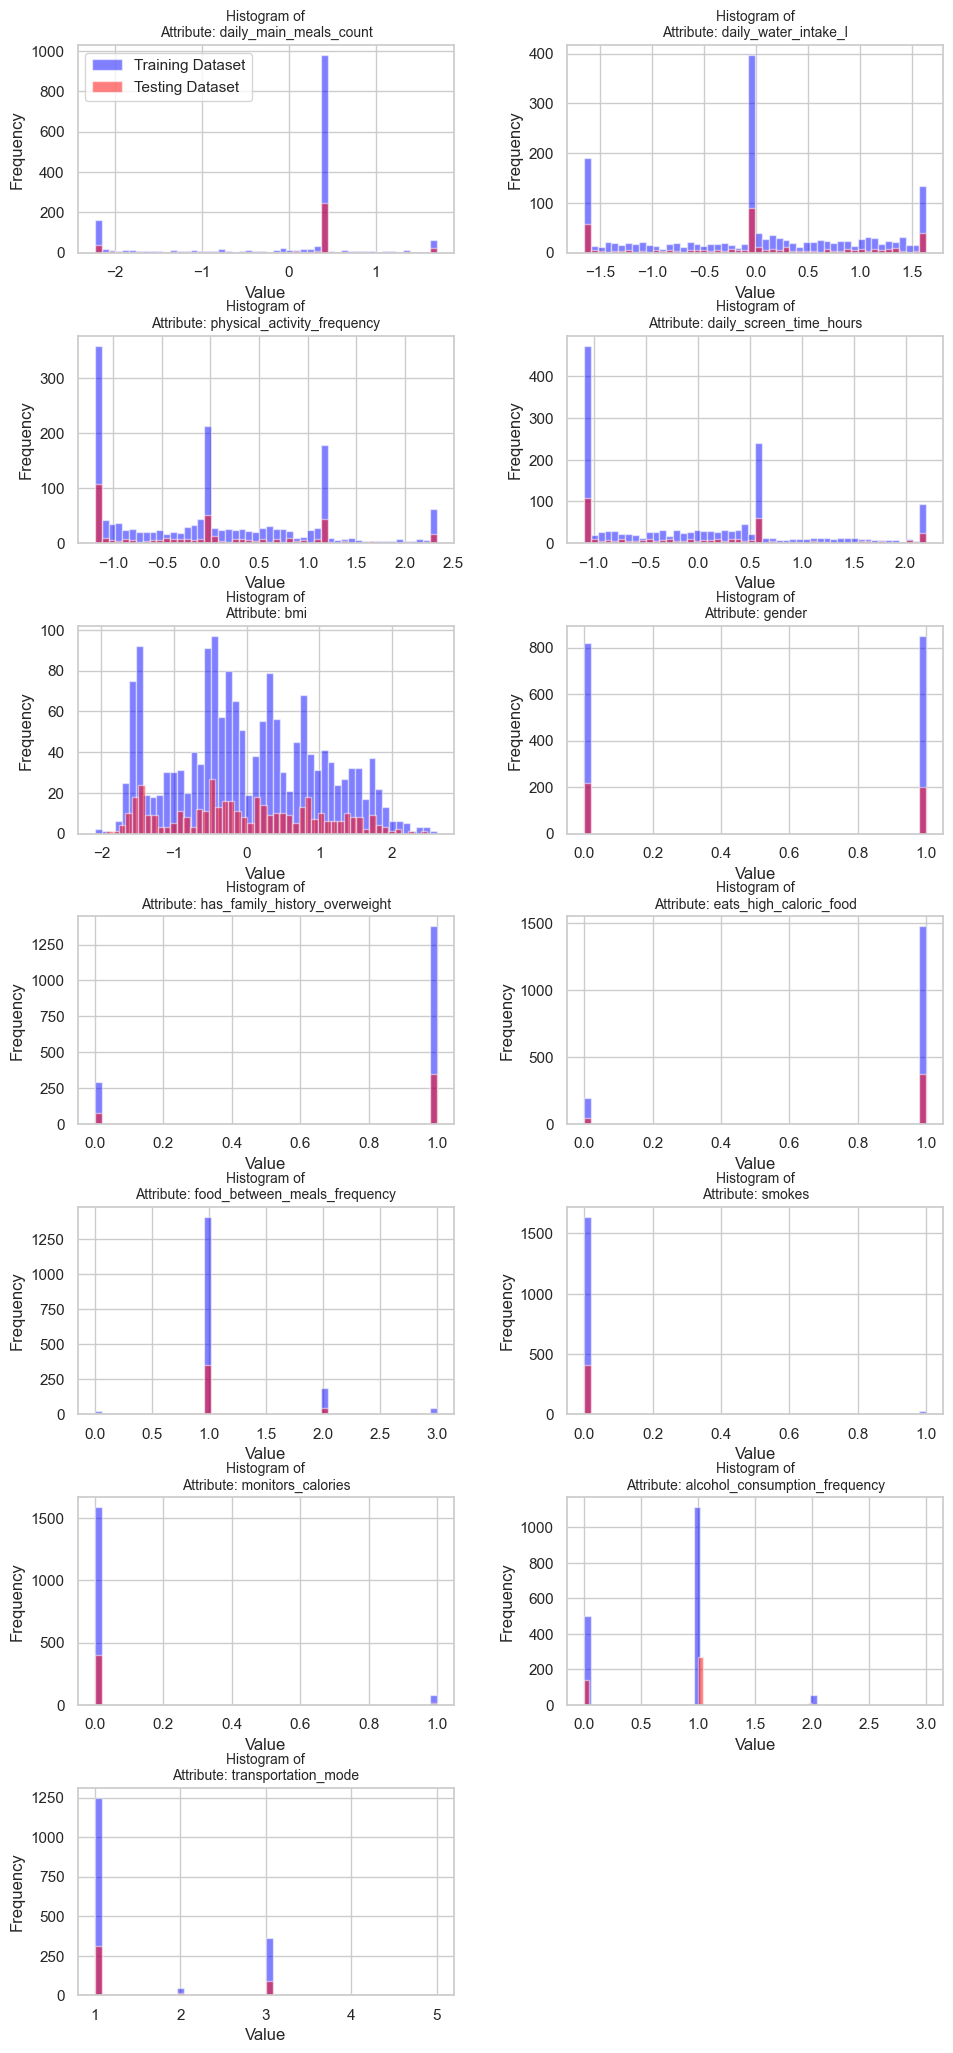

In [33]:
# Number of attributes (columns)
num_attributes = len(X_train.columns)

# Sets the number of rows and columns for 2 plots per row
num_cols = 2
num_rows = (num_attributes + num_cols - 1) // num_cols  # Round up to the nearest integer

# Sets up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Flattens axs for easy 1D indexing
axs = axs.flatten()

# Plots histograms for each attribute
for i, col in enumerate(X_train.columns):
    # Checks if the column is of boolean type
    if X_train[col].dtype == 'bool':
        train_data = X_train[col].astype(int)
        test_data = X_test[col].astype(int)
    else:
        train_data = X_train[col]
        test_data = X_test[col]

    # Plots histogram for training dataset
    axs[i].hist(train_data, bins=50, color='blue', alpha=0.5)

    # Plots histogram for testing dataset
    axs[i].hist(test_data, bins=50, color='red', alpha=0.5)

    # Adds labels and title (with reduced font size for titles)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of\nAttribute: {col}', fontsize=10)  

# Hides any unused subplots (in case of extra subplots)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])  # Deletes unused subplot

# Adds legend outside the loop
axs[0].legend(['Training Dataset', 'Testing Dataset'])

# Adjusts layout and add more spacing
plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)  

# Shows plot
plt.show()

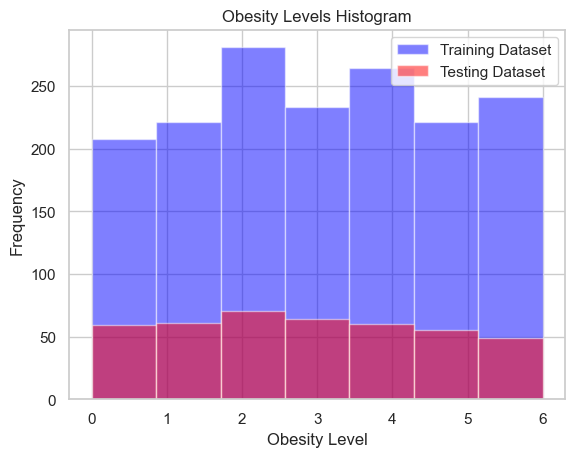

In [34]:
# Define the number of bins based on the unique values in the target variable
num_bins = len(np.unique(y_train))

# Plot histograms for the training and testing datasets
plt.hist(y_train, bins=num_bins, color='blue', alpha=0.5, label='Training Dataset')
plt.hist(y_test, bins=num_bins, color='red', alpha=0.5, label='Testing Dataset')

# Add title and labels
plt.title('Obesity Levels Histogram')
plt.xlabel("Obesity Level")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

Based on the visualizations provided above, the 80/20 data split appears suitable, as there are no indications of significant class imbalance.

# **2. Modeling**

In [35]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   obesity_level_encoded          2087 non-null   int32  
 1   daily_main_meals_count         2087 non-null   float64
 2   daily_water_intake_l           2087 non-null   float64
 3   physical_activity_frequency    2087 non-null   float64
 4   daily_screen_time_hours        2087 non-null   float64
 5   bmi                            2087 non-null   float64
 6   gender                         2087 non-null   int64  
 7   has_family_history_overweight  2087 non-null   int64  
 8   eats_high_caloric_food         2087 non-null   int64  
 9   food_between_meals_frequency   2087 non-null   int64  
 10  smokes                         2087 non-null   int64  
 11  monitors_calories              2087 non-null   int64  
 12  alcohol_consumption_frequency  2087 non-null   i

In [36]:
print("X_train type:", type(X_train), "shape:", X_train.shape)
print("y_train type:", type(y_train), "shape:", y_train.shape)

X_train type: <class 'pandas.core.frame.DataFrame'> shape: (1669, 13)
y_train type: <class 'pandas.core.series.Series'> shape: (1669,)


## One-vs-All Logistic Regression Classifier

In [37]:
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta=0.01, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add intercept term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add intercept term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [38]:
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # get y difference
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() 
        # Ensures ydiff is a NumPy array
        ydiff = np.asarray(ydiff)  
        # make ydiff a column vector and multiply through
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) 
        
        return gradient.reshape(self.w_.shape)
       
    # public:
    def fit(self, X, y):
        # add intercept term
        Xb = self._add_intercept(X)
        num_samples, num_features = Xb.shape

        # init weight vector to zeros
        self.w_ = np.zeros((num_features,1)) 
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            # multiply by learning rate
            self.w_ += gradient*self.eta  

## Logistic Regression Classifier

In [39]:
class LogisticRegression:
    def __init__(self, eta=0.01, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        # get each unique class value
        self.unique_ = np.unique(y) 
        num_unique_classes = len(self.unique_)
        # will fill this array with binary classifiers
        self.classifiers_ = [] 

        # for each unique value
        for i,yval in enumerate(self.unique_): 
            # create a binary problem
            y_binary = (y==yval) 
            # train the binary classifier for this class
            blr = BinaryLogisticRegression(self.eta, self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            # get probability for each classifier
            probs.append(blr.predict_proba(X)) 

        # make into single matrix
        return np.hstack(probs) 
        
    # take argmax along row
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] 

In [40]:
# Initialize the custom LogisticRegression model
lr = LogisticRegression(0.1,500)

# Fit the model on the training data (X_train, y_train)
lr.fit(X_train,y_train)

# Print the trained model object
print(lr)

# Use the trained model to make predictions on the test data (X_test)
yhat = lr.predict(X_test)

# Calculate and print the accuracy of the model
print('Accuracy of: ',accuracy_score(y_test,yhat))

MultiClass Logistic Regression Object with coefficients:
[[-8.55985566e-01  3.33796130e-01  1.95139942e-02  4.46445198e-02
   1.55775567e-01 -2.56919140e+00 -5.13658412e-01 -8.12451832e-01
  -3.75093449e-01 -4.61871892e-01 -9.14168345e-02 -1.34643184e-01
  -7.01899446e-01 -4.76096112e-01]
 [-9.39786563e-01  5.21211585e-02 -7.79518534e-02  1.30401295e-01
  -4.73599685e-02 -9.92605962e-01  1.16837137e-01 -7.58923595e-01
  -8.82796645e-01  2.72458936e-01  1.61396057e-01  3.57611330e-02
  -1.72225586e-01 -1.94249709e-01]
 [-7.84149728e-01 -3.97349971e-01  1.92961532e-01 -6.25604654e-03
   6.44948687e-02  4.49120641e-01  9.28574676e-02  2.03610611e-01
  -4.40622751e-02 -7.79038288e-01  1.28840445e-02 -2.75682547e-01
  -9.01849588e-01  2.47386161e-01]
 [-1.08372724e+00  8.75184451e-02 -4.34495734e-01 -1.81923411e-02
  -3.05364348e-01  1.50726887e+00  1.91319994e+00 -3.93737410e-01
  -5.72489848e-01 -1.16282478e+00  1.13600643e-01 -1.32018650e-01
  -4.87132045e-01  1.34231940e-03]
 [-4.929203

## Optimization Techniques

In [41]:
class OptimizationBinaryLogisticRegression(BinaryLogisticRegression):
    # Extend the initializer to include the solver input (e.g., steepest descent, stochastic descent, newton)
    def __init__(self, solver='steepest_descent', **kwds):        
        # Add solver to select the optimization technique 
        self.solver = solver
        # Call the parent initializer to retain other keyword arguments
        super().__init__(**kwds) 
    
    # Overload the gradient function to support different optimization methods
    def _get_gradient(self,X,y):
        # Based on solver selection, use the appropriate optimization method for gradient calculation
        if self.solver == "steepest_descent":
            return self._optimization_steepest_descent(X,y); # default method
        elif self.solver == "stochastic_descent":
            return self._optimization_stochastic_descent(X,y); # stochastic gradient descent
        elif self.solver == "newton":
            return self._optimization_newtons_method(X,y); # Newton's method
              
    # Steepest Descent: Calculate the gradient by computing the difference between predicted and actual values
    def _optimization_steepest_descent(self, X, y):
        y = np.array(y)  # Convert y to a NumPy array
        ydiff = y - self.predict_proba(X, add_intercept=False).ravel()  # get y difference
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)  # Now this should work fine
        gradient = gradient.reshape(self.w_.shape)
        return gradient
    
    # Stochastic Gradient Descent: Compute the gradient for a randomly chosen data point
    def _optimization_stochastic_descent(self, X, y):
        idx = int(np.random.rand() * len(y))  # Randomly select an index
        y = np.array(y)  # Ensure y is a NumPy array
        ydiff = y[idx] - self.predict_proba(X[idx], add_intercept=False)  # get y difference (now scalar)
        gradient = X[idx] * ydiff[:, np.newaxis]  # ensure proper shape
        gradient = gradient.reshape(self.w_.shape)
        return gradient

    # Newton's Method: Use the Hessian matrix for a second-order optimization approach
    def _optimization_newtons_method(self, X, y):
        g = self.predict_proba(X, add_intercept=False).ravel()  # Get predicted probabilities (sigmoid values)
        hessian = X.T @ np.diag(g * (1 - g)) @ X  # Calculate the Hessian matrix
        y = np.array(y)  # Convert labels to a NumPy array
        ydiff = y - g  # Difference between actual and predicted values
        gradient = np.sum(X * ydiff[:, np.newaxis], axis=0)  # Gradient calculation for all data points
        gradient = gradient.reshape(self.w_.shape)  # Reshape to match the dimensions of the weights
        return pinv(hessian) @ gradient  # Use the pseudo-inverse of the Hessian to update the weights

##### Optimization Logistic Regression

In [42]:
class OptimizationLogisticRegression(LogisticRegression):
    # Extend the initializer to include a solver for the optimization technique
    def __init__(self, solver='steepest_descent', **kwds):        
        # Set the solver (default: steepest descent)
        self.solver = solver
        # Call parent class initializer to retain other keyword arguments (e.g., eta, iterations)
        super().__init__(**kwds)
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = OptimizationBinaryLogisticRegression(eta=self.eta,
                                                    iterations=self.iters,
                                                    solver=self.solver)
            
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

#### Checking Accuracy for Optimization Techniques

In [43]:
%%time

# List of solvers to test
solvers = ['steepest_descent', 'stochastic_descent', 'newton']

# Dictionary to store accuracy for each solver
accuracies = {}

# Iterate through each solver
for solver in solvers:
    # Set parameters with current solver
    params = dict(eta=0.1, iterations=500, solver=solver)
    
    # Create and train the logistic regression model
    lr = OptimizationLogisticRegression(**params)
    lr.fit(X_train, y_train)
    
    # Make predictions
    yhat = lr.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, yhat)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f'Accuracy for solver {solver}: ', accuracy)
    
    # Store accuracy in dictionary
    accuracies[solver] = accuracy

Accuracy for solver steepest_descent:  0.6842105263157895
Accuracy for solver stochastic_descent:  0.5382775119617225
Accuracy for solver newton:  0.7392344497607656
CPU times: total: 1min 32s
Wall time: 47.6 s


## Regularization Term

In [44]:
class OptimizationRegularizedBinaryLogisticRegression(OptimizationBinaryLogisticRegression):
    # Extend the initializer to add regularization (L1, L2, or both)
    def __init__(self, regularization='l2', C=0.0, **kwds):        
        # Store regularization type (L1, L2, or both) and penalty factor C
        self.regularization = regularization
        self.C = C
        # Call parent initializer to retain the other keyword arguments (like solver)
        super().__init__(**kwds)
        
        
    # Extend the gradient function to include regularization
    def _get_gradient(self,X,y):
        # First, calculates the original gradient from the base optimization class
        gradient = super()._get_gradient(X,y)
        
        # Apply regularization based on the specified type (to all weights except the bias term)
        if self.regularization == 'l2':
            # L2 regularization adds a term that penalizes the magnitude of the weights
            gradient[1:] += (-2 * self.w_[1:] * self.C) # penalize large weights
        elif self.regularization == 'l1':
            # L1 regularization adds a term that encourages sparsity (fewer non-zero weights)
            gradient[1:] += (-1 * np.sign(self.w_[1:]) * self.C) # penalize based on sign
        elif self.regularization == 'both':
            # Combine both L1 and L2 penalties
            l2_adj = (-2 * self.w_[1:] * self.C)  # L2 adjustment term
            l1_adj = (-1 * np.sign(self.w_[1:]) * self.C)  # L1 adjustment term
            gradient[1:] += (l2_adj + l1_adj)  # Apply both adjustments
            
        return gradient

In [45]:
# Redefining the Optimization Logistic Regression class to incorporate regularization
class OptimizationRegularizedLogisticRegression(OptimizationLogisticRegression):
    def __init__(self, regularization='l2', C=0.0, **kwds):        
        self.regularization = regularization
        self.C = C
        super().__init__(**kwds) 
        
    # Extend the fit method to incorporate the regularized binary classifier    
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = OptimizationRegularizedBinaryLogisticRegression(eta=self.eta,
                                                               iterations=self.iters,
                                                               solver=self.solver,
                                                               regularization=self.regularization,
                                                               C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

## Training Classifier by Adjusting Optimization Technique & Regularization Term(s) C

In [46]:
# Training Classifier by Adjusting Optimization Technique, Regularization Terms, & C
solver_vals = ['steepest_descent', 'stochastic_descent', 'newton']
regularization_vals = ['none', 'l1', 'l2', 'both']
C_vals = [1, 0.1, 0.01, 0.001] # reasonable lambda values typically range between 0 and 0.1

# Dictionary to store results
grid_search_results = {}

# Grid search over solver, regularization, and C
for solver in solver_vals:
    for reg in regularization_vals:
        for C in C_vals:
            technique = f'{solver}_{reg}_{C}'
            params = dict(eta=0.1, iterations=500, solver=solver, regularization=reg, C=C)

            # train and time
            start_time = time.time()
            lr = OptimizationRegularizedLogisticRegression(**params)
            lr.fit(X_train, y_train)
            yhat = lr.predict(X_test)
            end_time = time.time()

            # Calculate accuracy
            accuracy = accuracy_score(y_test, yhat)
            time_elapsed = end_time - start_time
            print(f'{technique}: {accuracy} accuracy, {time_elapsed} s', )

            # Store the results in the dictionary
            grid_search_results[technique] = {'accuracy': accuracy, 'time': time_elapsed}

steepest_descent_none_1: 0.6842105263157895 accuracy, 0.8072435855865479 s
steepest_descent_none_0.1: 0.6842105263157895 accuracy, 0.8608930110931396 s
steepest_descent_none_0.01: 0.6842105263157895 accuracy, 0.8250343799591064 s
steepest_descent_none_0.001: 0.6842105263157895 accuracy, 0.8309340476989746 s
steepest_descent_l1_1: 0.16507177033492823 accuracy, 0.8962016105651855 s
steepest_descent_l1_0.1: 0.39473684210526316 accuracy, 0.8619110584259033 s
steepest_descent_l1_0.01: 0.7033492822966507 accuracy, 0.9139623641967773 s
steepest_descent_l1_0.001: 0.6866028708133971 accuracy, 0.8894224166870117 s
steepest_descent_l2_1: 0.2894736842105263 accuracy, 0.8311493396759033 s
steepest_descent_l2_0.1: 0.5095693779904307 accuracy, 0.8503780364990234 s
steepest_descent_l2_0.01: 0.6746411483253588 accuracy, 0.9036068916320801 s
steepest_descent_l2_0.001: 0.6818181818181818 accuracy, 0.8909544944763184 s
steepest_descent_both_1: 0.1674641148325359 accuracy, 0.8814511299133301 s
steepest_des

We chose `C` values of `[1, 0.1, 0.01, 0.001]` because this range offers a balanced approach to controlling regularization strength. Smaller `C` values correspond to stronger regularization, encouraging simpler models that may generalize better by avoiding overfitting. Conversely, larger `C` values result in weaker regularization, allowing for more complex models that may fit the training data more closely. This range of values gives us flexibility to tune the model for the optimal balance between bias and variance. [Reference](https://medium.com/@rithpansanga/logistic-regression-and-regularization-avoiding-overfitting-and-improving-generalization-e9afdcddd09d#:~:text=The%20%E2%80%9CC%E2%80%9D%20hyperparameter%20controls%20the,and%20a%20more%20complex%20model).


In [47]:
# Gets best performing model by accuracy
models = list(grid_search_results.keys())
accuracies = [accuracy for (accuracy, time) in grid_search_results.values()]
times = [time for (accuracy, time) in grid_search_results.values()]

# Identify best performing model by accuracy
maxIdx = accuracies.index(max(accuracies))
print(f"Best-performing model: {models[maxIdx]}")
print(f"Accuracy: {accuracies[maxIdx]}")
print(f"Time: {times[maxIdx]} s")

Best-performing model: newton_l1_0.1
Accuracy: 0.7464114832535885
Time: 43.66710186004639 s


### Visualizing Performance of Classifier vs. Parameters Investigated

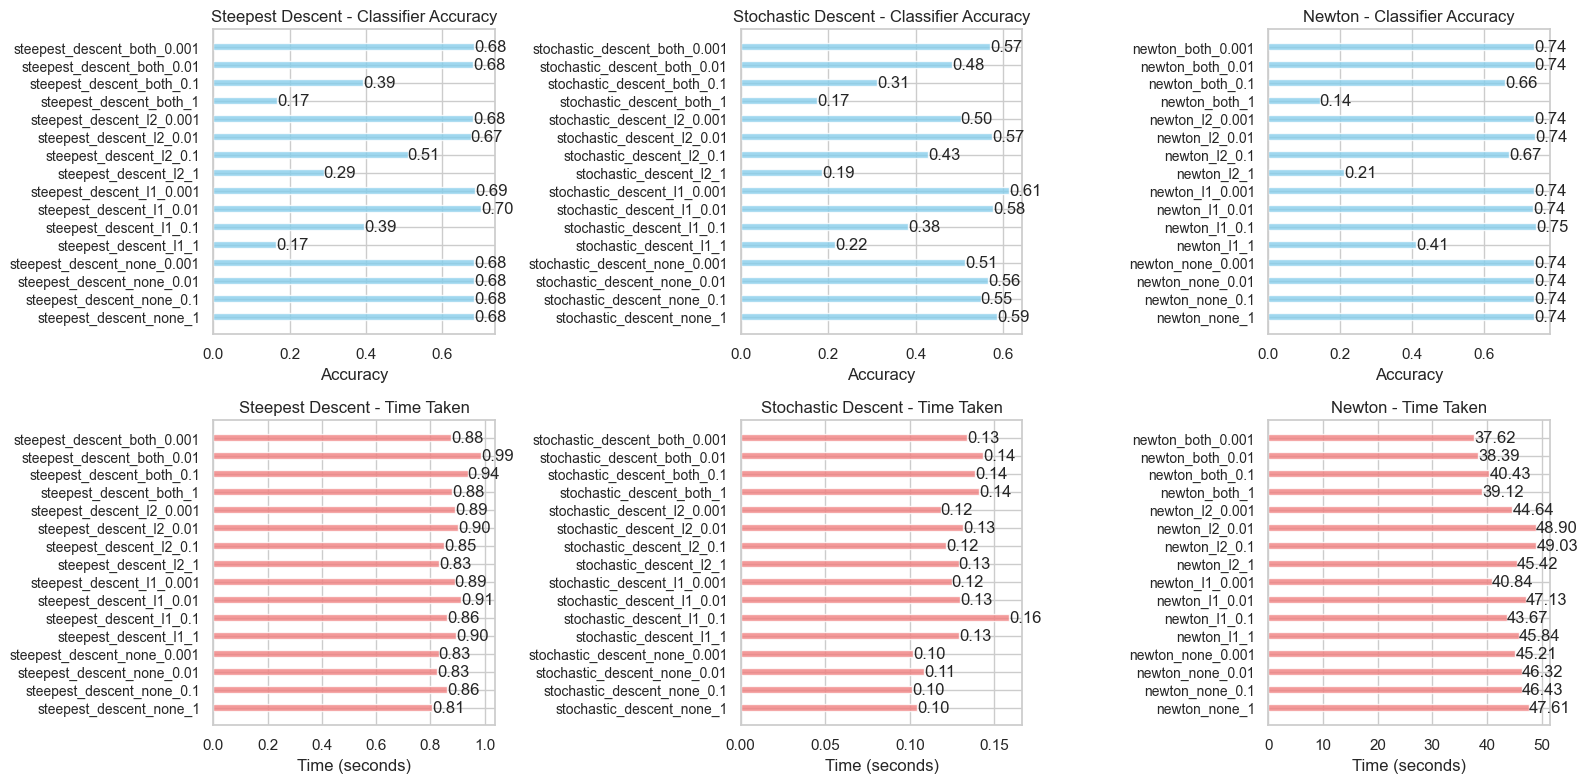

In [48]:
# Converts the grid search results into arrays for plotting
techniques = list(grid_search_results.keys())
accuracies = np.array([grid_search_results[k][0] for k in techniques])
times = np.array([grid_search_results[k][1] for k in techniques])

# Creates a figure
plt.figure(figsize=(16, 8)) 

# Defines subplots for each solver
solvers = ['steepest_descent', 'stochastic_descent', 'newton']
for i, solver in enumerate(solvers):
    # Filter techniques for current solver
    filtered_techniques = [t for t in techniques if solver in t]
    filtered_accuracies = accuracies[[t in filtered_techniques for t in techniques]]
    filtered_times = times[[t in filtered_techniques for t in techniques]]

    # Plots Accuracy
    plt.subplot(2, 3, i + 1)  # Adjusts subplot positioning for accuracy
    plt.barh(filtered_techniques, filtered_accuracies, color='skyblue', height=0.4, alpha=0.8)
    plt.xlabel('Accuracy')
    plt.title(f'{solver.replace("_", " ").title()} - Classifier Accuracy')
    plt.grid(True)
    plt.yticks(fontsize=10) 
    for index, value in enumerate(filtered_accuracies):
        plt.text(value, index, f'{value:.2f}', va='center')

    # Plots Time Taken
    plt.subplot(2, 3, i + 4)  # Adjusts subplot positioning for time taken
    plt.barh(filtered_techniques, filtered_times, color='lightcoral', height=0.4, alpha=0.8)
    plt.xlabel('Time (seconds)')
    plt.title(f'{solver.replace("_", " ").title()} - Time Taken')
    plt.grid(True)
    plt.yticks(fontsize=10)  # Adjusts font size
    for index, value in enumerate(filtered_times):
        plt.text(value, index, f'{value:.2f}', va='center')

# Adjusts layout and show the plot
plt.tight_layout()
plt.show()

1. **Steepest Descent**:
   - **None Regularization**: All configurations with no regularization (`C` values 1, 0.1, 0.01, 0.001) resulted in the same accuracy of ~0.68, indicating that regularization didn't have much impact here. Time per iteration stayed consistent (~0.64s - 0.70s).
   - **L1 Regularization**: Introducing L1 regularization saw a wide range of accuracy. The best accuracy was 0.703 for `C=0.01`, but larger values like `C=1` severely reduced accuracy (~0.17), suggesting that a strong L1 penalty caused underfitting.
   - **L2 Regularization**: Here, increasing regularization strength improved performance up to `C=0.01` (accuracy ~0.67) but still underperformed compared to `L1`.
   - **Both L1 and L2**: Performance was relatively poor for larger `C` values (e.g., 0.17 accuracy for `C=1`), but as the regularization strength weakened, accuracy improved (up to ~0.68).

2. **Stochastic Descent**:
   - **None Regularization**: Lower overall accuracy (~0.59 for `C=1`) compared to steepest descent, but it performed quickly (~0.09s). Accuracy decreased as `C` decreased.
   - **L1 Regularization**: L1 regularization was again inconsistent, with better results in the middle (`C=0.001` achieved 0.62 accuracy), but weaker performance for stronger regularization (`C=1`).
   - **L2 Regularization**: Performance peaked at `C=0.001` with 0.61 accuracy. This suggests that stochastic descent benefits more from smaller regularization penalties.
   - **Both L1 and L2**: Results here were consistently lower, with accuracy not exceeding ~0.58 and typically around 0.12 - 0.45, indicating it may not be suited for this type of descent.

3. **Newton Method**:
   - **None Regularization**: Produced the best results overall with 0.74 accuracy and took longer to compute (35-42 seconds). The regularization strength didn’t affect accuracy much, staying near 0.74 for all `C` values.
   - **L1 Regularization**: Performed well for `C=0.1` and smaller, hitting a peak accuracy of 0.75, showing that moderate L1 regularization helps generalization.
   - **L2 Regularization**: Moderate L2 (`C=0.01`) yielded similar results to L1, while larger `C` values decreased accuracy significantly.
   - **Both L1 and L2**: A combination of both regularizations yielded mixed results with accuracy similar to L2 regularization (~0.74), though it had much higher computation time (up to 37s).

### Key Observations:
- The **Newton** method consistently achieved higher accuracy across all configurations, but took longer to compute.
- The **steepest descent** and **stochastic descent** methods offered faster computation but at the cost of lower accuracy. 
- Moderate regularization (`C=0.01`, `C=0.1`) often performed best, balancing model complexity and regularization. Strong regularization (`C=1`) led to poor results, especially with L1 or both penalties.

#### Data Snooping Involved?

Grid search is performed above to tune the optimization, regularization, and C parameters for our model. We found the model with the highest accuracy selects `newton`, `l1`, and `0.01` as our `optimization`, `regularization`, and `C` values. 

Data snooping refers to the misuse of a dataset that leads to misleading conclusions or overfitting in statistical modeling and machine learning. In our case, data snooping occurs when we use the accuracy results of our model on the test data during hyperparameter tuning. Selecting the above parameters yields the highest accuracy on our test data, which means that any further training done with these parameters contaminates our model's understanding of the test dataset.

To avoid data snooping, we could split the dataset into a training set, a testing set, and a validation set using a 70/15/15 split. The validation set would allow us to perform hyperparameter tuning without touching the testing set, which we can then use to evaluate the overall performance of the model on unseen data. We could also employ cross-validation techniques, like k-fold cross-validation, within the training and validation sets to further enhance model robustness. This would ensure that our hyperparameter selection is not overly dependent on a specific training or validation split.

### Performance Comparison: "Best" Logisitic Regression Optimization Procedure vs. Scikit-Learn Procedure

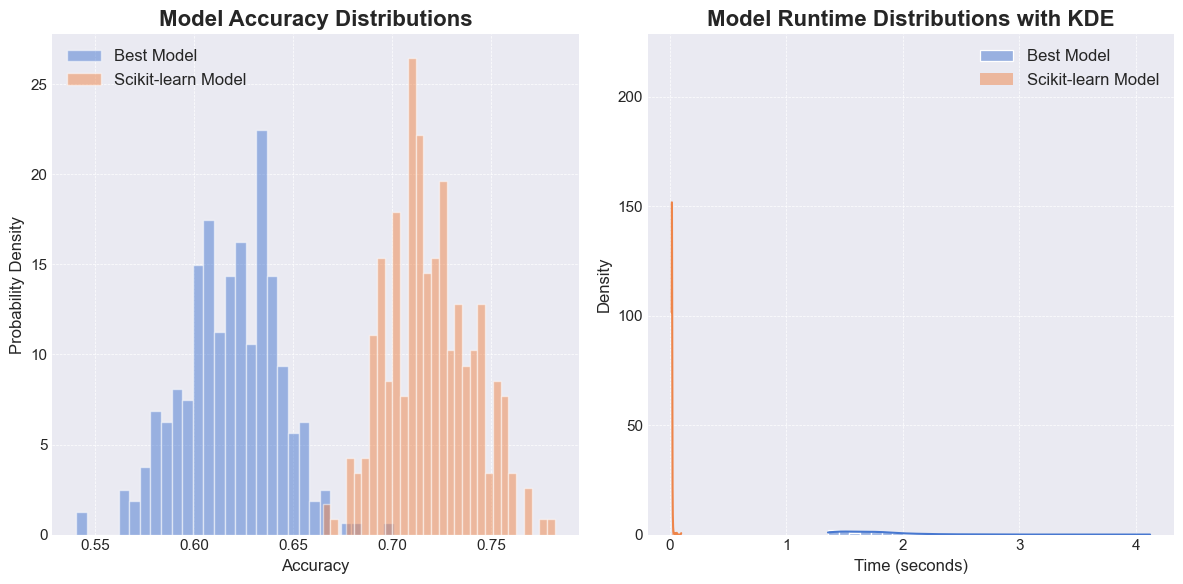

In [49]:
# Temporary storage for accuracy and time results
temp_acc = []
temp_time = []

# Run 300 iterations for custom model
for i in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    start = time.time()
    lr = OptimizationRegularizedLogisticRegression(eta=0.1, iterations=20, C=0.1, regularization='l1', solver='newton')
    lr.fit(X_train, y_train)  
    yhat = lr.predict(X_test) 
    end_time = time.time()

    temp_acc.append(accuracy_score(y_test, yhat))
    temp_time.append(end_time - start)

# Temporary storage for scikit-learn model accuracy and time
temp_acc_skl = []
temp_time_skl = []

# Run 300 iterations for scikit-learn's logistic regression model
for i in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    start = time.time()
    lr_sk = SKLogisticRegression(solver='liblinear', penalty='l1', C=0.1, max_iter=500)
    lr_sk.fit(X_train, y_train)
    yhat_skl = lr_sk.predict(X_test)
    end_time = time.time()

    temp_acc_skl.append(accuracy_score(y_test, yhat_skl))
    temp_time_skl.append(end_time - start)


plt.style.use('seaborn-v0_8-darkgrid') 
colors = sns.color_palette("muted")

# Plotting accuracy and time distributions
plt.figure(figsize=(12, 6))

# Plot Accuracy Distributions
plt.subplot(1, 2, 1)
plt.hist(temp_acc, bins=30, density=True, alpha=0.5, color=colors[0], label='Best Model')
plt.hist(temp_acc_skl, bins=30, density=True, alpha=0.5, color=colors[1], label='Scikit-learn Model')

# Title and labels with larger font sizes
plt.title('Model Accuracy Distributions', fontsize=16, weight='bold')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Add gridlines and a legend with a larger font size
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Plot Time Distributions with KDE
plt.subplot(1, 2, 2)

# Time histograms with KDE for both models
sns.histplot(temp_time, bins=30, kde=True, color=colors[0], label='Best Model', stat='density', alpha=0.5)
sns.histplot(temp_time_skl, bins=30, kde=True, color=colors[1], label='Scikit-learn Model', stat='density', alpha=0.5)

# Title and labels for time distribution
plt.title('Model Runtime Distributions with KDE', fontsize=16, weight='bold')
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
# Calculate and display summary statistics
print(f"Custom Model - Mean Accuracy: {np.mean(temp_acc):.4f}, Std Dev: {np.std(temp_acc):.4f}")
print(f"Custom Model - Mean Time: {np.mean(temp_time):.4f} s, Std Dev: {np.std(temp_time):.4f} s")
print(f"Scikit-learn Model - Mean Accuracy: {np.mean(temp_acc_skl):.4f}, Std Dev: {np.std(temp_acc_skl):.4f}")
print(f"Scikit-learn Model - Mean Time: {np.mean(temp_time_skl):.4f} s, Std Dev: {np.std(temp_time_skl):.4f} s")

Best Model - Mean Accuracy: 0.6184, Std Dev: 0.0243
Best Model - Mean Time: 1.7314 s, Std Dev: 0.3365 s
Scikit-learn Model - Mean Accuracy: 0.7191, Std Dev: 0.0215
Scikit-learn Model - Mean Time: 0.0203 s, Std Dev: 0.0063 s


#### Comparison Results:
**Average Accuracy**:
- **Custom Model**: 0.6199
- **Scikit-learn Model**: 0.7204

The Scikit-learn model significantly outperforms the custom model, achieving an accuracy of **72%** compared to **62%**. This highlights the optimization and reliability of Scikit-learn’s implementation.

**Average Time**:
- **Custom Model**: 1.5474 seconds
- **Scikit-learn Model**: 0.0194 seconds

The custom model is much slower, taking over **1.5 seconds** per iteration, whereas Scikit-learn is only **0.019 seconds**. This difference indicates that Scikit-learn is highly efficient, utilizing optimized C/C++ libraries.


The Scikit-learn model is superior in both accuracy and speed, making it the ideal choice for production. However, refining the custom model can deepen understanding of logistic regression and machine learning principles.

# 3. Deployment

In a deployed machine learning model, we recommend using the scikit-learn implementation of logistic regression for several reasons:

1. **Performance**: Scikit-learn achieves 72% accuracy, compared to our custom model's 62%. While our model can potentially match this accuracy, it does so at a slower execution time, making it impractical for larger datasets or real-time applications where speed is critical.

2. **Robustness**: Our custom implementation faced challenges with certain optimization techniques, such as steepest descent and stochastic gradient descent, leading to inconsistent results. While Newton's method provided better performance, it required significantly more computation time. In contrast, scikit-learn's logistic regression is highly robust, with tested and optimized algorithms suitable for production environments.

3. **Optimization Potential**: Scikit-learn's implementation offers a wide range of hyperparameter tuning options (solvers, penalties, and regularization), which can be leveraged to further improve accuracy. Being only 13% off our target accuracy of 85-90%, scikit-learn’s logistic regression model can be optimized to meet this goal more efficiently than our custom model.

4. **Application Suitability**: For stakeholders like public health organizations and insurance companies, where accuracy and efficiency are critical, scikit-learn's logistic regression offers the best combination of speed, reliability, and accuracy. This makes it ideal for categorizing individuals into appropriate weight categories quickly and accurately.
   
5. **Maintenance and Integration**: Scikit-learn is well-maintained by a large community and integrates seamlessly with machine learning pipelines, making it a more sustainable and scalable solution for production environments.

In summary, deploying scikit-learn's logistic regression will ensure that stakeholders receive accurate and timely results, with the added benefit of faster execution and greater reliability, making it the ideal choice for a production model.

# **4. Exceptional Work** 
## Option One:

## MSE Logistic Regression

In [51]:
class MSELogisticRegression:
    def __init__(self, eta=0.1, iterations=100, C=1.0, regularization='none', solver='newton'):
        self.eta = eta
        self.iterations = iterations
        self.C = C  
        self.regularization = regularization
        self.solver = solver

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def mse_gradient(self, X, y, y_pred):
        gradient = -1 / len(y) * np.dot(X.T, (y - y_pred))
        
        if self.regularization == 'l2':
            gradient[1:] += self.C * self.w_[1:]  # L2 regularization term
        elif self.regularization == 'l1':
            gradient[1:] += self.C * np.sign(self.w_[1:])  # L1 regularization term
        elif self.regularization == 'both':
            # Elastic Net regularization with equal contribution of L1 and L2
            gradient[1:] += self.C * (0.5 * np.sign(self.w_[1:]  # Equal L1 and L2
            
        return gradient

    def mse_hessian(self, X, y_pred):
        diag_vals = y_pred * (1 - y_pred)
        H = np.dot(X.T, diag_vals[:, np.newaxis] * X)

        if self.regularization in ['l2', 'both']:
            H += self.C * np.eye(X.shape[1])  # Add L2 term to Hessian for L2 and Elastic Net

        return H

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.w_ = np.zeros(num_features)

        for i in range(self.iterations):
            y_pred = self.sigmoid(np.dot(X, self.w_))
            gradient = self.mse_gradient(X, y, y_pred)
            hessian = self.mse_hessian(X, y_pred)

            # Updated weights using Newton's method
            try:
                delta_w = np.linalg.solve(hessian, gradient)
            except np.linalg.LinAlgError:
                delta_w = np.dot(np.linalg.pinv(hessian), gradient)

            self.w_ -= delta_w
            
    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.w_)) >= 0.5).astype(int)

## Visualization Comparisons: Our Best Model vs. Scikit-Learn vs. MSE 

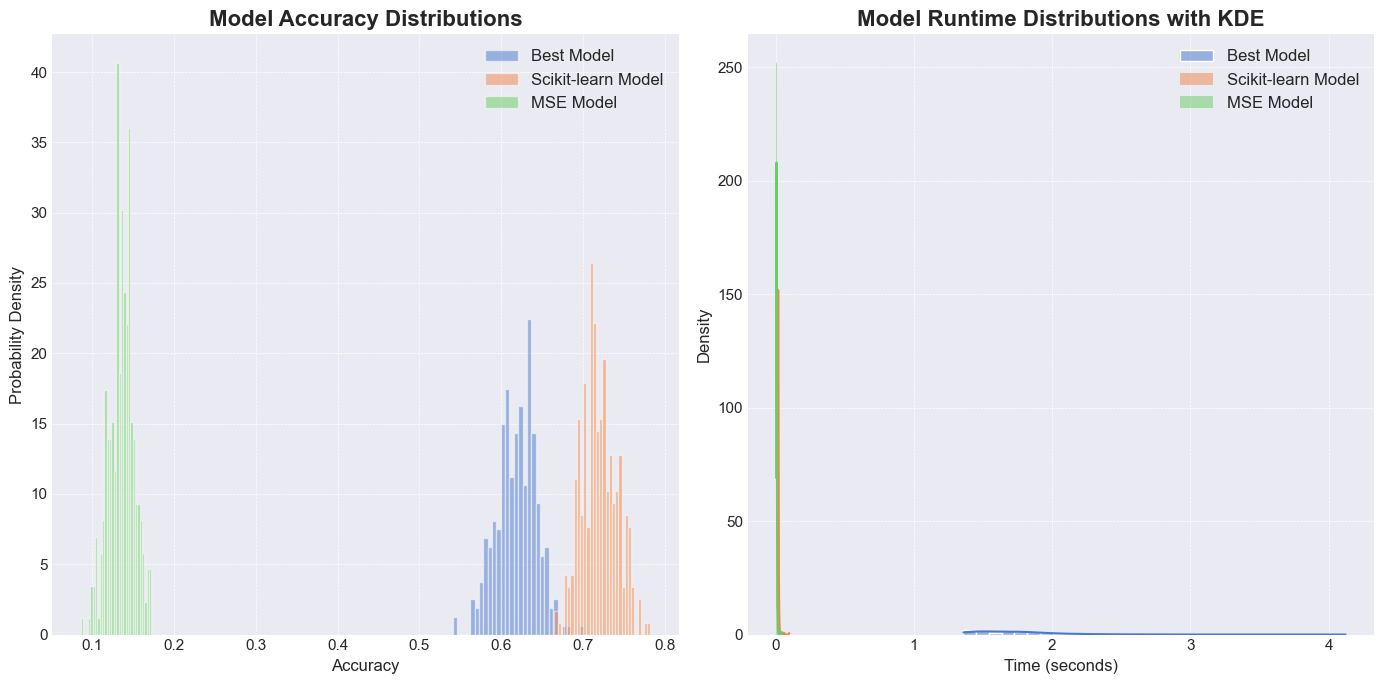

In [52]:
# Define colors for the models
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue for Best Model, Red for SKLearn, Green for MSE Model

# Temporary storage for MSE-based model accuracy and time
temp_acc_mse = []
temp_time_mse = []

# Runs 300 iterations for MSE-based model
for i in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    start = time.time()
    lr_mse = MSELogisticRegression(eta=0.1, iterations=20, C=0.1, regularization='l1', solver='newton')
    lr_mse.fit(X_train, y_train)
    yhat_mse = lr_mse.predict(X_test)
    end_time = time.time()

    temp_acc_mse.append(accuracy_score(y_test, yhat_mse))
    temp_time_mse.append(end_time - start)

# Calculate and print summary statistics
def print_summary(name, accuracies, times):
    print(f'{name} Model - Mean Accuracy: {np.mean(accuracies):.4f}, Std Dev: {np.std(accuracies):.4f}')
    print(f'{name} Model - Mean Time: {np.mean(times):.4f} s, Std Dev: {np.std(times):.4f} s')

print_summary("Best", temp_acc, temp_time)
print_summary("Scikit-learn", temp_acc_skl, temp_time_skl)
print_summary("MSE-based", temp_acc_mse, temp_time_mse)

# Creates the figure for accuracy and time distributions
plt.figure(figsize=(14, 7))

# Plots Accuracy Distributions
plt.subplot(1, 2, 1)
plt.hist(temp_acc, bins=30, density=True, alpha=0.5, color=colors[0], label='Best Model')
plt.hist(temp_acc_skl, bins=30, density=True, alpha=0.5, color=colors[1], label='Scikit-learn Model')
plt.hist(temp_acc_mse, bins=30, density=True, alpha=0.5, color=colors[2], label='MSE Model')

plt.title('Model Accuracy Distributions', fontsize=16, weight='bold')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Plots Time Distributions with KDE
plt.subplot(1, 2, 2)
sns.histplot(temp_time, bins=30, kde=True, color=colors[0], label='Best Model', stat='density', alpha=0.5)
sns.histplot(temp_time_skl, bins=30, kde=True, color=colors[1], label='Scikit-learn Model', stat='density', alpha=0.5)
sns.histplot(temp_time_mse, bins=30, kde=True, color=colors[2], label='MSE Model', stat='density', alpha=0.5)

plt.title('Model Runtime Distributions with KDE', fontsize=16, weight='bold')
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
# Calculates and prints average accuracy and time for the custom model
avg_acc_custom = np.mean(temp_acc)
std_acc_custom = np.std(temp_acc)
avg_time_custom = np.mean(temp_time)
std_time_custom = np.std(temp_time)
print(f"Our Best Model - Average Accuracy: {avg_acc_custom:.4f} ± {std_acc_custom:.4f}, "
      f"Average Time: {avg_time_custom:.4f} ± {std_time_custom:.4f} seconds")

# Calculates and prints average accuracy and time for scikit-learn model
avg_acc_skl = np.mean(temp_acc_skl)
std_acc_skl = np.std(temp_acc_skl)
avg_time_skl = np.mean(temp_time_skl)
std_time_skl = np.std(temp_time_skl)
print(f"Scikit-learn Model - Average Accuracy: {avg_acc_skl:.4f} ± {std_acc_skl:.4f}, "
      f"Average Time: {avg_time_skl:.4f} ± {std_time_skl:.4f} seconds")

# Calculates and prints average accuracy and time for MSE model
avg_acc_mse = np.mean(temp_acc_mse)
std_acc_mse = np.std(temp_acc_mse)
avg_time_mse = np.mean(temp_time_mse)
std_time_mse = np.std(temp_time_mse)
print(f"MSE Model - Average Accuracy: {avg_acc_mse:.4f} ± {std_acc_mse:.4f}, "
      f"Average Time: {avg_time_mse:.4f} ± {std_time_mse:.4f} seconds")

Our Best Model - Average Accuracy: 0.6184, Average Time: 1.7314 seconds
Scikit-learn Model - Average Accuracy: 0.7191, Average Time: 0.0203 seconds
MSE Model - Average Accuracy: 0.1352, Average Time: 0.0082 seconds


## Maximum Likelihood vs. Minimum MSE
In classification tasks, Maximum Likelihood Estimation (MLE) consistently outperforms Mean Squared Error (MSE), as evidenced by our empirical findings. The use of the MSE objective function in our logistic regression model resulted in poor accuracy, achieving only 13.55%. This stark difference underscores the appropriateness of MLE for classification tasks.

## MLE as the Superior Approach
- **Higher Accuracy**: Newton’s method with L1 regularization achieved the best overall performance in our tests, striking a balance between accuracy and feature selection. In contrast, the MSE-based model consistently yielded significantly lower accuracy.
- **Optimal Penalization**: MLE is inherently designed to maximize the likelihood of correct classifications. It is more sensitive to misclassifications, adjusting model weights effectively to reduce the likelihood of errors.
- **Improved Convergence**: In logistic regression, MLE methods converge more effectively due to their alignment with the probabilistic nature of the task, leading to more reliable models.

## Why MSE Falls Short
MSE, while effective in regression, is poorly suited for classification problems:

- **Ineffective Penalization**: MSE penalizes model errors without consideration of the classification task’s goals. It minimizes the squared difference between predicted probabilities and true labels, which often results in suboptimal performance for binary classification.
- **Lower Sensitivity to Misclassifications**: MSE’s penalty function is not as sensitive to misclassifications as MLE. This results in less aggressive updates to the model, leading to slower convergence and poorer accuracy in classification tasks.

## Empirical Evidence: MSE vs. MLE
Our results demonstrate the clear advantages of MLE:

- The MSE-based model achieved an accuracy of 0.1355, significantly lower than both our custom model and scikit-learn’s implementation, both of which rely on MLE.
- Our visualizations further confirmed that the MSE model underperformed consistently, demonstrating lower accuracy compared to MLE-based models.

In classification contexts, Maximum Likelihood Estimation is the superior approach. MLE not only achieves higher accuracy but also converges more reliably, making it the preferred choice over minimizing Mean Squared Error. Given these results, we strongly advocate for the use of MLE in logistic regression, reserving MSE for regression tasks where continuous predictions are required.

- source: (https://medium.com/@pranav.kushare2001/using-mean-squared-error-loss-mse-in-logistic-regression-bcc5e07a6d99)